## Biomass Weight Estimation Model

In [1]:
# import Libraries
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR

# scaling library
from sklearn.model_selection import train_test_split  # imports the train_test_split function
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import  StandardScaler

# visualization library
import matplotlib.pyplot as plt
import seaborn as sns

# Check if the model is performing optimally
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split

# from yellowbrick.datasets import load_concrete
from yellowbrick.regressor import ResidualsPlot

# Ignoring Warning
import warnings
warnings.filterwarnings("ignore")

Read Data...

In [10]:
biomass_data = pd.read_csv('Biomass_weight_model.csv')
biomass_data

,Wood ID,length(cm),circumference(cm),width(cm),wet_weight(g),dry weight(g),width(mm),Estimated Pie
0,R1,94.0,12.5,3.550,898,466.8,35.50,3.521127
1,R2,86.0,16.5,4.997,1190,609.2,49.97,3.301981
2,R3,57.0,12.0,3.406,446,217.2,34.06,3.523194
3,R4,61.0,16.0,5.113,1018,572.6,51.13,3.129278
4,R5,76.0,9.5,2.536,396,231.2,25.36,3.746057
...,...,...,...,...,...,...,...,...
108,R110,26.5,11.5,3.644,186,125.0,36.44,3.155873
109,R111,37.8,9.0,2.635,166,128.4,26.35,3.415560
110,R112,37.5,14.9,3.888,290,181.2,38.88,3.832305
111,R113,102.0,20.4,6.391,2682,1368.0,63.91,3.191989


In [11]:
biomass_data.columns

Index(['Wood ID', 'length(cm)', 'circumference(cm)', 'width(cm)',
       'wet_weight(g)', 'dry weight(g)', 'width(mm)', 'Estimated Pie'],
      dtype='object')

### Visualizing the Relationship between the Features

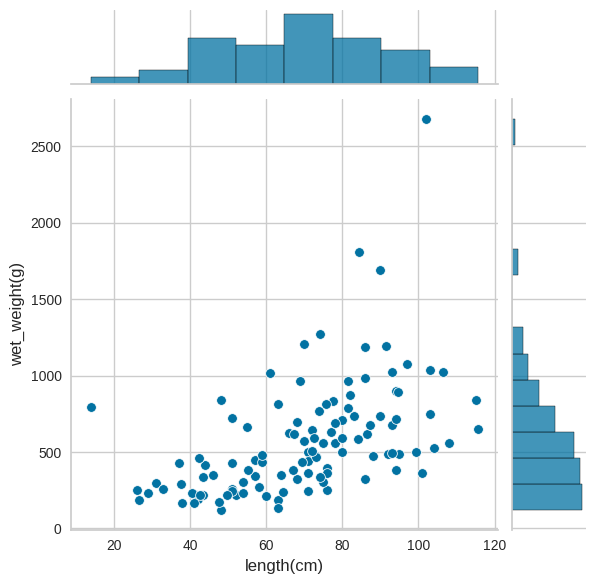

In [12]:
sns.jointplot(x='length(cm)', y= 'wet_weight(g)', data= biomass_data)  #, kind='hex', color='#433e85')

Already we see some outliers in the model. Therefore, I am going to remove every row in the data frame that has a weight above $1500$

In [13]:
biomass_data_new = biomass_data[biomass_data['wet_weight(g)'] < 1500]
biomass_data_new

,Wood ID,length(cm),circumference(cm),width(cm),wet_weight(g),dry weight(g),width(mm),Estimated Pie
0,R1,94.0,12.5,3.550,898,466.8,35.50,3.521127
1,R2,86.0,16.5,4.997,1190,609.2,49.97,3.301981
2,R3,57.0,12.0,3.406,446,217.2,34.06,3.523194
3,R4,61.0,16.0,5.113,1018,572.6,51.13,3.129278
4,R5,76.0,9.5,2.536,396,231.2,25.36,3.746057
...,...,...,...,...,...,...,...,...
106,R108,60.0,10.0,2.959,214,163.2,29.59,3.379520
107,R109,47.5,10.0,2.810,176,132.4,28.10,3.558719
108,R110,26.5,11.5,3.644,186,125.0,36.44,3.155873
109,R111,37.8,9.0,2.635,166,128.4,26.35,3.415560


### EDA with Wet Weight

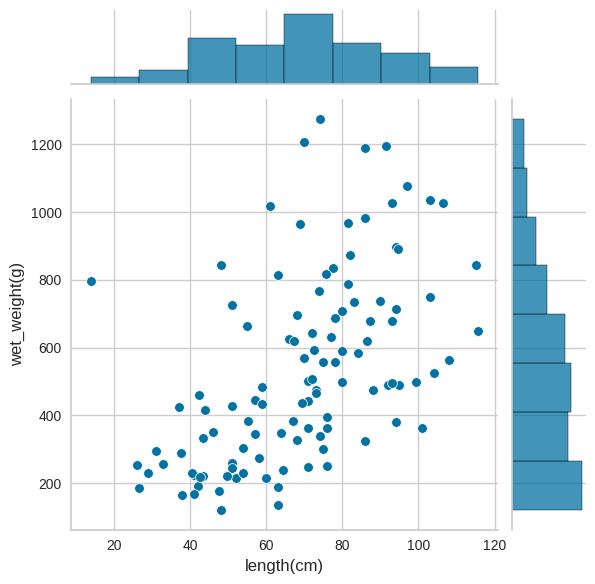

In [14]:
sns.jointplot(x='length(cm)', y= 'wet_weight(g)', data= biomass_data_new)  #, kind='hex', color='#433e85')

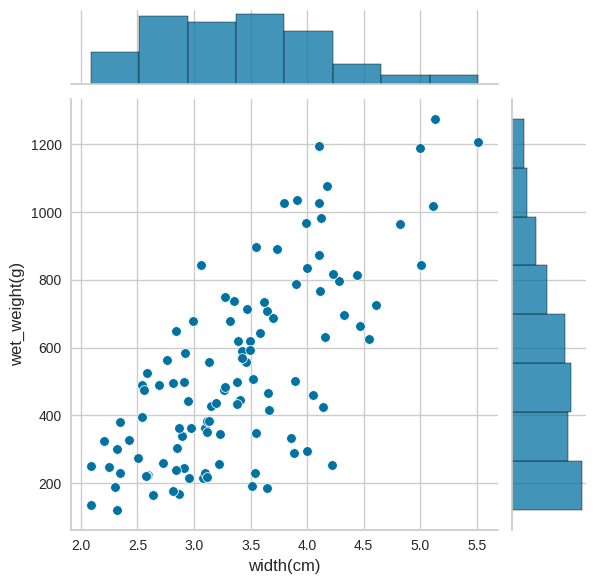

In [15]:
sns.jointplot(x='width(cm)', y= 'wet_weight(g)', data= biomass_data_new)  #, kind='hex', color='#433e85')

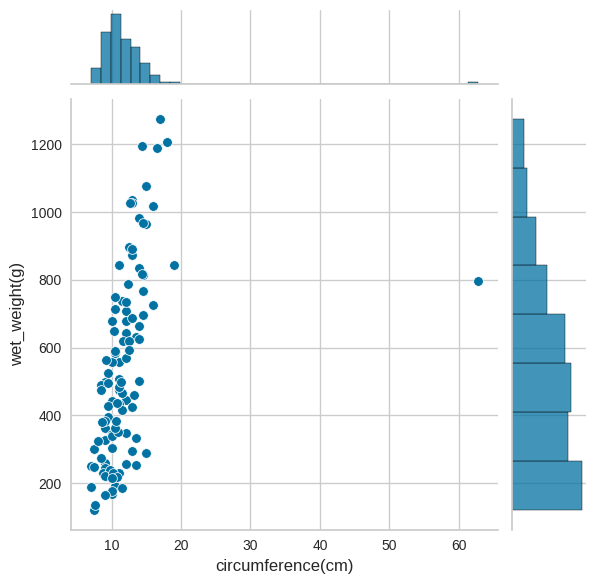

In [16]:
sns.jointplot(x='circumference(cm)', y= 'wet_weight(g)', data= biomass_data_new)  #, kind='hex', color='#433e85')

In [17]:
new_bdata = biomass_data_new[biomass_data_new['circumference(cm)'] < 20]

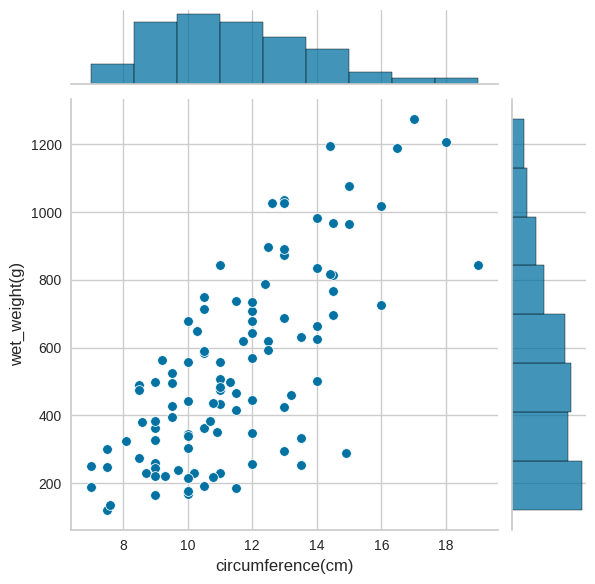

In [18]:
sns.jointplot(x='circumference(cm)', y= 'wet_weight(g)', data= neaw_bdata)  #, kind='hex', color='#433e85')

### At this stage, most of the outliers have been removed!

### WET WEIGHT

#### Relationship of the length with Weight

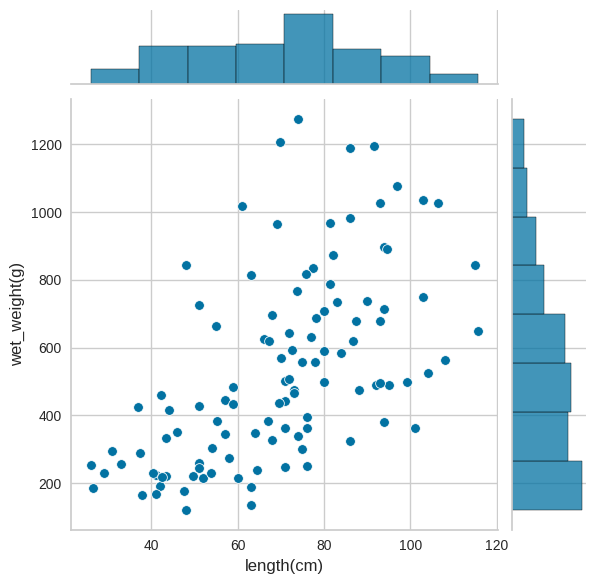

In [19]:
sns.jointplot(x='length(cm)', y= 'wet_weight(g)', data= new_bdata)  #, kind='hex', color='#433e85')

#### Relationship of the width with Weight

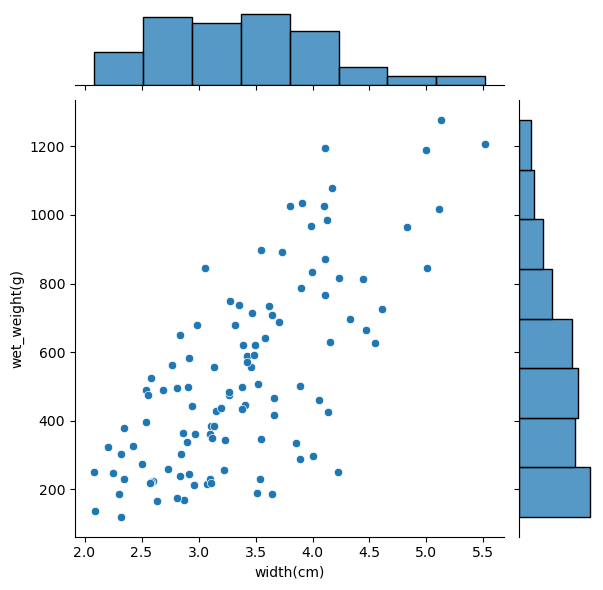

In [12]:
sns.jointplot(x='width(cm)', y= 'wet_weight(g)', data= new_bdata)  #, kind='hex', color='#433e85')

#### Relationship of the circumference with Weight

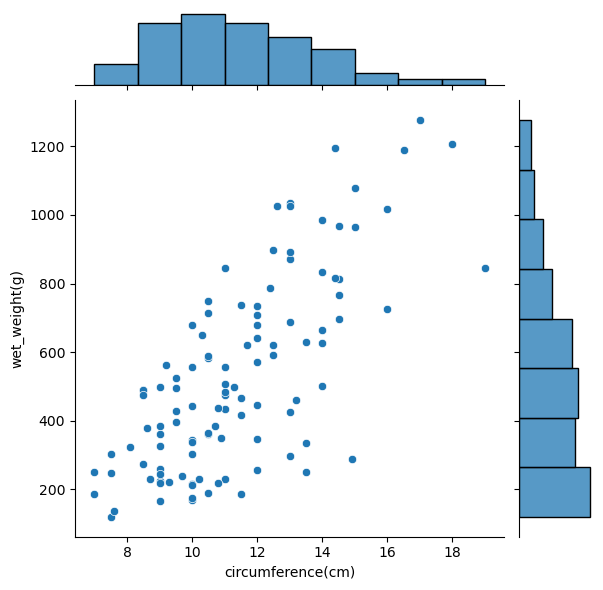

In [13]:
sns.jointplot(x='circumference(cm)', y= 'wet_weight(g)', data= new_bdata)

### Correlation between features

<Axes: >

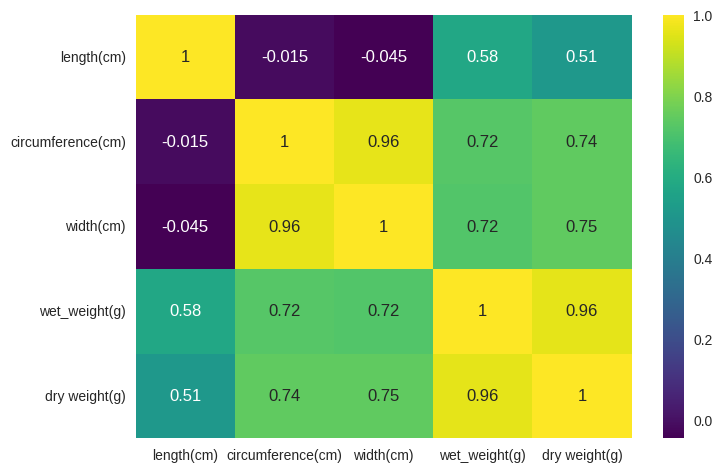

In [20]:
sns.heatmap(new_bdata.drop(columns=['width(mm)', 'Estimated Pie']).corr(), annot=True, cmap="viridis")

### DRY WEIGHT

#### Relationship of the length with Weight

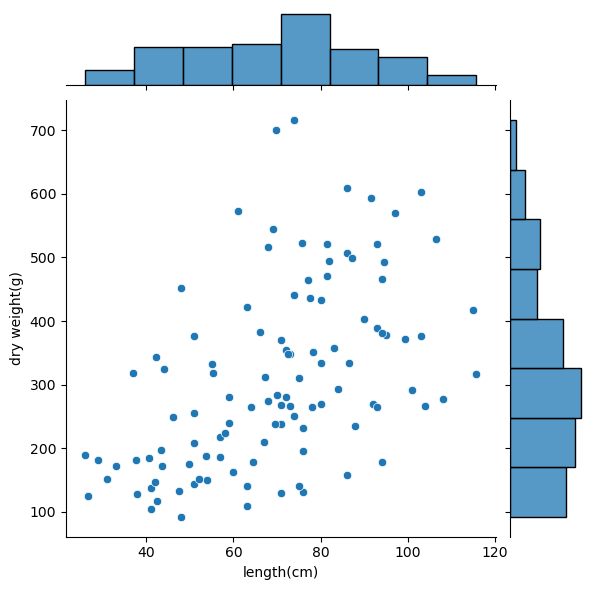

In [15]:
sns.jointplot(x='length(cm)', y= 'dry weight(g)', data= new_bdata)  #, kind='hex', color='#433e85')

#### Relationship of the width with Weight

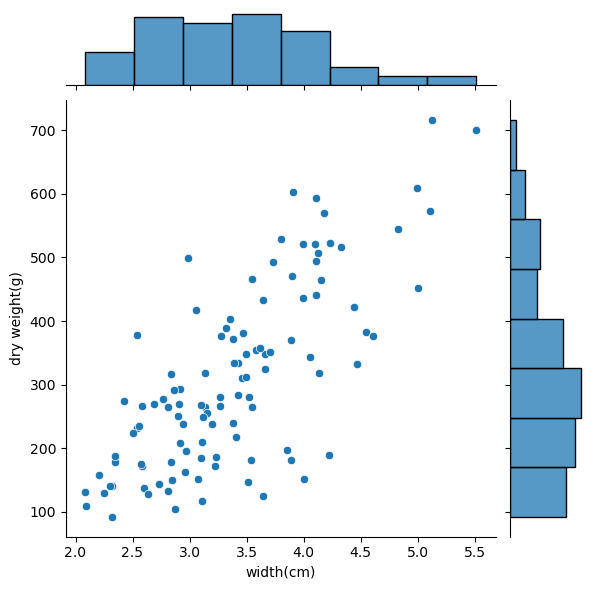

In [16]:
sns.jointplot(x='width(cm)', y= 'dry weight(g)', data= new_bdata)  #, kind='hex', color='#433e85')

#### Relationship of the circumference with Weight

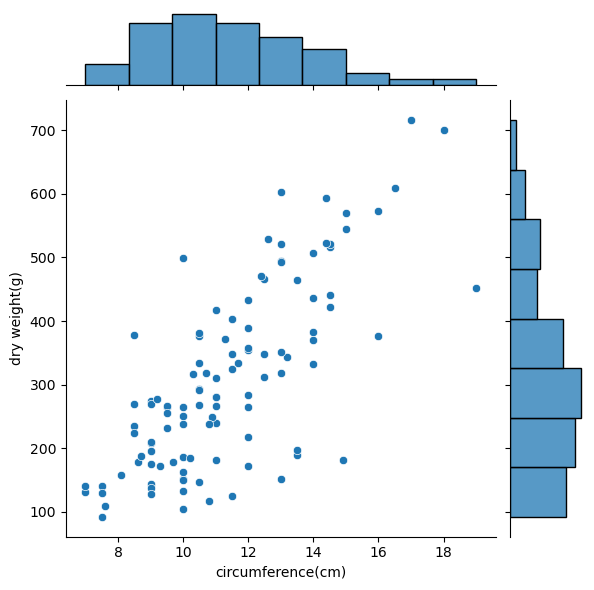

In [17]:
sns.jointplot(x='circumference(cm)', y= 'dry weight(g)', data= new_bdata)

### Relationship between the Width and the Circumference

In [18]:
new_bdata.columns

Index(['Wood ID', 'length(cm)', 'circumference(cm)', 'width(cm)',
       'wet_weight(g)', 'dry weight(g)', 'width(mm)', 'Estimated Pie'],
      dtype='object')

In [19]:
new_bdata['circumference(cm)'] / new_bdata['width(cm)']

0      3.521127
1      3.301981
2      3.523194
3      3.129278
4      3.746057
         ...   
106    3.379520
107    3.558719
108    3.155873
109    3.415560
110    3.832305
Length: 109, dtype: float64

In [20]:
np.mean(new_bdata['circumference(cm)'] / new_bdata['width(cm)'])

3.3672828252366473

---
Estimating the Circumference for the Root Proxies

In [21]:
width = np.array([11.8, 5.4, 7.8, 9.9, 6.2, 5.4, 8.9])
3.3672828252366473 *width

array([39.73393734, 18.18332726, 26.26480604, 33.33609997, 20.87715352,
       18.18332726, 29.96881714])

### Weight Model

In [6]:
class WeightModel:
    """
    WeightModel is a regression machine learning solver.
    
    The use of multiple regression algorithms is used to efficiently predict
    the weight.
    
    """
    def __init__(self, feature, label, test_fraction = 0.2):
        """
        Constructor method for the WeightModel class.

        Parameters:
        feature: pandas dataframe
            N x k dimension matrix containing the input features, where N is the number of 
            observations and k is the number of features
        label: pandas dataframe
            N x 1 dimension matrix containing the corresponding labels for each input observation
        test_fraction: float
            The fraction of the data to be used as test data. The default value is 0.2 (i.e., 20% 
            of the data is used for testing).
        """
        self.data = feature.to_numpy()  # converts the dataframe to numpy array
        self.label = label.to_numpy().reshape(-1, )
        self.test_fraction = test_fraction
        self.transform_scaler = 0  # scales a new dataset before predicting
        self.transform_label = 0
        
    def dataset_scaler(self, rand_num=42):
        """
        This method performs feature scaling on the input data.

        Returns:
        Tuple:
            X_train_scaled: numpy array
                Scaled training input feature data
            X_test_scaled: numpy array
                Scaled testing input feature data
            y_train: numpy array
                Training labels
            y_test: numpy array
                Testing labels
        """
        start_state = rand_num  # random seed for solution replication
        X_train, X_test, y_train, y_test = train_test_split(self.data, self.label, 
                                                            test_size=self.test_fraction, random_state=start_state)
        
        self.transform_scaler = StandardScaler()  # scikit learn library for scaling
        self.transform_scaler.fit(self.data)
        
        X_trained_scaled, X_test_scaled = self.transform_scaler.transform(X_train), self.transform_scaler.transform(X_test)
        
        # transform label
        self.transform_label = StandardScaler()
        self.transform_label.fit(self.label.reshape(-1, 1))
        
        y_trained_scaled, y_test_scaled = self.transform_label.transform(y_train.reshape(-1, 1)), \
                                    self.transform_label.transform(y_test.reshape(-1, 1))
        
        return X_trained_scaled, X_test_scaled, y_trained_scaled, y_test_scaled
    
    def ml_regressors(self, regressor = 'SVR', default=True):
        """
        This method trains a regression model on the input data.

        Parameters:
        Regressors: str, default 'SVR'
            A string specifying the type of regressors to use. There are four regressors that are used.
            
        Returns:
        Trained regression model object.
        """
        # using default regressors
        if default:
            regressor_dict = {
                   'SVR': SVR(),
                   'RF': RandomForestRegressor(),
                   'MLP': MLPRegressor(),
                   'LR': LinearRegression()
                              }
            
        else:
            regressor_dict = {
                   'SVR': SVR(kernel=kern, C=c_val, gamma=gam_val, epsilon=eps_val),
                   'RF': RandomForestRegressor(n_estimators=n_est, 
                             max_features=max_featR),
                   'MLP': MLPRegressor(
                            hidden_layer_sizes=hid_lay,
                            learning_rate_init=tol,
                            early_stopping=True,
                            random_state=0,
                            max_iter=max_i
                        ),
                   'LR': LinearRegression()
                              }
        
            
        selected_regressor = regressor_dict[regressor]
        Xtrain_scale, _, ytrain_scale, _ = self.dataset_scaler()

        my_model = selected_regressor.fit(Xtrain_scale, ytrain_scale)  
        
        return my_model
        
    def weight_predict(self, model, X_test):
        """Predict the weight given the test dataset."""
        
        unscaled = model.predict(X_test)
        scaled = self.transform_label.inverse_transform(unscaled.reshape(-1, 1))
        
        return scaled
        
        
    def model_score(self, model, X_test, y_test):
        """
        This method calculates the accuracy score of the trained model on the test data.

        Parameters:
        model: sklearn model object
            The trained model object
        X_test: numpy array
            The testing feature data
        y_test: numpy array
            The testing labels

        Returns:
        float:
            The accuracy score of the model on the testing data.
        """
        
        return model.score(X_test, y_test)
        

    

In [30]:
def MAE(arr):
    return np.mean(np.abs(arr[:, 0] - arr[:, 1]))

def error_perc(arr):
    return np.mean(np.abs((arr[:, 1] - arr[:, 0]) / arr[:, 1]) *100)

In [22]:
new_bdata.columns

Index(['Wood ID', 'length(cm)', 'circumference(cm)', 'width(cm)',
       'wet_weight(g)', 'dry weight(g)', 'width(mm)', 'Estimated Pie'],
      dtype='object')

In [23]:
independent_var = new_bdata[['length(cm)', 'circumference(cm)', 'width(cm)']]
response_var = new_bdata['wet_weight(g)']

wet_model = WeightModel(feature = independent_var, 
                        label = response_var, 
                        test_fraction = 0.2)

Extracting the Scaled Value to be used to test the score of the model.

In [24]:
X_train_sca, X_test_scaled, y_train_sca, y_test = wet_model.dataset_scaler(rand_num=30)

In [25]:
y_actual = wet_model.transform_label.inverse_transform(y_test.reshape(-1, 1))
y_actual

array([[1190.],
       [ 898.],
       [ 892.],
       [ 844.],
       [ 816.],
       [ 442.],
       [ 224.],
       [ 220.],
       [ 230.],
       [ 558.],
       [ 590.],
       [ 460.],
       [ 324.],
       [1194.],
       [ 630.],
       [ 620.],
       [ 680.],
       [ 558.],
       [ 188.],
       [1206.],
       [ 244.],
       [ 620.]])

#### SVR

In [26]:
trained_model = wet_model.ml_regressors(regressor='SVR')

In [27]:
y_pred = wet_model.weight_predict(trained_model, X_test_scaled)
err_svr = np.hstack((y_pred, y_actual))
err_svr

array([[1162.29833111, 1190.        ],
       [ 847.61254755,  898.        ],
       [ 919.88461478,  892.        ],
       [ 871.80257476,  844.        ],
       [ 844.88189159,  816.        ],
       [ 384.6412201 ,  442.        ],
       [ 211.94942184,  224.        ],
       [ 197.31486596,  220.        ],
       [ 202.34545059,  230.        ],
       [ 490.22719516,  558.        ],
       [ 591.51143037,  590.        ],
       [ 398.11639129,  460.        ],
       [ 351.7371934 ,  324.        ],
       [1005.22514079, 1194.        ],
       [ 808.91476485,  630.        ],
       [ 550.89758714,  620.        ],
       [ 535.77293844,  680.        ],
       [ 571.93556362,  558.        ],
       [ 232.15281964,  188.        ],
       [1173.59706942, 1206.        ],
       [ 226.31073265,  244.        ],
       [ 699.04758325,  620.        ]])

In [31]:
print('The Mean Absolute Error for the SVR is:', MAE(err_svr))
print(f'The Percentage Error for the SVR is: {np.round(error_perc(err_svr), 2)} %')

The Mean Absolute Error for the SVR is: 54.97997928277987
The Percentage Error for the SVR is: 9.92 %


In [33]:
score = wet_model.model_score(trained_model, X_test_scaled, y_test)
score

0.9440724477843444

### RF

In [34]:
trained_model = wet_model.ml_regressors(regressor='RF')

In [35]:
y_pred = wet_model.weight_predict(trained_model, X_test_scaled)
err_rf = np.hstack((y_pred, y_actual))
err_rf

array([[1147.48, 1190.  ],
       [ 730.62,  898.  ],
       [ 849.72,  892.  ],
       [ 896.22,  844.  ],
       [ 775.04,  816.  ],
       [ 401.9 ,  442.  ],
       [ 215.56,  224.  ],
       [ 229.42,  220.  ],
       [ 234.04,  230.  ],
       [ 536.58,  558.  ],
       [ 591.3 ,  590.  ],
       [ 442.28,  460.  ],
       [ 393.64,  324.  ],
       [ 943.56, 1194.  ],
       [ 672.1 ,  630.  ],
       [ 542.4 ,  620.  ],
       [ 624.3 ,  680.  ],
       [ 532.12,  558.  ],
       [ 214.08,  188.  ],
       [1174.16, 1206.  ],
       [ 246.02,  244.  ],
       [ 634.24,  620.  ]])

In [36]:
print('The Mean Absolute Error for the RF is:', MAE(err_rf))
print(f'The Percentage Error for the RF is: {np.round(error_perc(err_rf), 2)} %')

The Mean Absolute Error for the RF is: 47.424545454545495
The Percentage Error for the RF is: 7.23 %


### MLP

In [37]:
trained_model = wet_model.ml_regressors(regressor='MLP')

In [38]:
y_pred = wet_model.weight_predict(trained_model, X_test_scaled)
err_mlp = np.hstack((y_pred, y_actual))
err_mlp

array([[1196.61261465, 1190.        ],
       [ 791.5787185 ,  898.        ],
       [ 857.50662087,  892.        ],
       [ 864.06461764,  844.        ],
       [ 857.32034365,  816.        ],
       [ 394.32705215,  442.        ],
       [ 169.26407393,  224.        ],
       [ 217.33729652,  220.        ],
       [ 224.33884023,  230.        ],
       [ 476.19931258,  558.        ],
       [ 548.13940759,  590.        ],
       [ 405.01987999,  460.        ],
       [ 360.4552459 ,  324.        ],
       [ 979.10251638, 1194.        ],
       [ 805.21362696,  630.        ],
       [ 551.45938081,  620.        ],
       [ 535.24518224,  680.        ],
       [ 538.59441372,  558.        ],
       [ 203.21005866,  188.        ],
       [1195.70266152, 1206.        ],
       [ 236.09858796,  244.        ],
       [ 657.16523411,  620.        ]])

In [39]:
print('The Mean Absolute Error for the MLP is:', MAE(err_mlp))
print(f'The Percentage Error for the MLP is: {np.round(error_perc(err_mlp), 2)} %')

The Mean Absolute Error for the MLP is: 55.8239907529212
The Percentage Error for the MLP is: 9.43 %


### LR

In [40]:
trained_model = wet_model.ml_regressors(regressor='LR')

In [41]:
y_pred = wet_model.weight_predict(trained_model, X_test_scaled)
err_lr = np.hstack((y_pred, y_actual))
err_lr

array([[1112.76209868, 1190.        ],
       [ 774.65700075,  898.        ],
       [ 829.19328161,  892.        ],
       [ 844.4568167 ,  844.        ],
       [ 816.70336944,  816.        ],
       [ 404.38628281,  442.        ],
       [  62.34317562,  224.        ],
       [ 128.20885638,  220.        ],
       [ 102.5219953 ,  230.        ],
       [ 506.46005275,  558.        ],
       [ 598.75054984,  590.        ],
       [ 482.17233935,  460.        ],
       [ 323.34743467,  324.        ],
       [ 915.83514761, 1194.        ],
       [ 793.67454629,  630.        ],
       [ 544.77975782,  620.        ],
       [ 548.43640556,  680.        ],
       [ 573.98873603,  558.        ],
       [ 141.20542217,  188.        ],
       [1125.57398314, 1206.        ],
       [ 217.92564599,  244.        ],
       [ 664.09142642,  620.        ]])

In [42]:
print('The Mean Absolute Error for the LR is:', MAE(err_lr))
print(f'The Percentage Error for the LR is: {np.round(error_perc(err_lr), 2)} %')

The Mean Absolute Error for the LR is: 74.00914741925976
The Percentage Error for the LR is: 16.09 %


In [43]:
trained_model.predict(X_test_scaled[:3, 0].reshape(1, -1))

array([[1.35272394]])

## Secondary Model

##### Using GridSearch to optimize the weight estimator

#### #1: SVR

In [ ]:
from sklearn.model_selection import GridSearchCV

# defining parameter range
param_grid = {'C': [0.01,0.1, 1, 10, 100, 1000, 5000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['linear', 'rbf','poly'],
              'epsilon':[0.0001,0.002, 0.5, 1, 0.3, 2]}

'''param_grid = {'kernel': ('linear', 'rbf','poly'), 
              'C':[1.5, 10],'gamma': [1e-7, 1e-4],
              'epsilon':[0.1,0.2,0.5,0.3]}'''

grid = GridSearchCV(SVR(), param_grid)  #, refit = True, verbose = 3) print out the progress report

# fitting the model for grid search
grid.fit(X_train_sca, y_train_sca)
grid.best_params_

#### #2: RF

In [ ]:
# defining parameter range
param_grid_rf = {'n_estimators': [1, 2, 3, 4, 5, 6],
              'max_features': [1, 2, 3, 4]}
grid_rf = GridSearchCV(RandomForestRegressor(), param_grid_rf)  #, refit = True, verbose = 3) print out the progress report

# fitting the model for grid search
grid_rf.fit(X_train_sca, y_train_sca)
grid_rf.best_params_

#### #3: MLP

In [ ]:
# defining parameter range
param_grid_mlp = {'hidden_layer_sizes': [500, 2000, 3000, 1400, 5, 60, 1000],
              'learning_rate_init': [1, 0.1, 0.001, 0.0001, 0.0005, 0.00001, 1e-8],
              'max_iter': [1, 10, 20, 30, 40, 100, 200, 1000]
                 
                 }
grid_mlp = GridSearchCV(MLPRegressor(), param_grid_mlp)  #, refit = True, verbose = 3) print out the progress report

# fitting the model for grid search
grid_mlp.fit(X_train_sca, y_train_sca)
grid_mlp.best_params_

---
#### Wet Weight Optimized Parameter Based on Grid Search

In [44]:
# Using the optimized parameters
# SVR
kern ='rbf'
c_val = 5000
gam_val = 0.001
eps_val = 0.0001

# RF 
n_est = 5
max_featR = 3

# MLP
hid_lay = 5
tol = 0.1
max_i = 100

In [45]:
opt_trained_model = wet_model.ml_regressors(regressor='SVR', default=False)

In [46]:
y_pred_opt = wet_model.weight_predict(opt_trained_model, X_test_scaled)
err_svr_opt = np.hstack((y_pred_opt, y_actual))
err_svr_opt

array([[1309.93193222, 1190.        ],
       [ 818.27202839,  898.        ],
       [ 892.04266   ,  892.        ],
       [ 844.35848823,  844.        ],
       [ 871.33496553,  816.        ],
       [ 409.49929903,  442.        ],
       [ 158.09602446,  224.        ],
       [ 203.51529608,  220.        ],
       [ 195.70074288,  230.        ],
       [ 497.51689683,  558.        ],
       [ 589.39761239,  590.        ],
       [ 424.52032575,  460.        ],
       [ 324.05762051,  324.        ],
       [1023.05268047, 1194.        ],
       [ 833.04622702,  630.        ],
       [ 549.93804787,  620.        ],
       [ 537.28267207,  680.        ],
       [ 568.83456277,  558.        ],
       [ 212.18525798,  188.        ],
       [1287.87711377, 1206.        ],
       [ 252.21307349,  244.        ],
       [ 678.92161856,  620.        ]])

In [47]:
print('The Mean Absolute Error for the SVR is:', MAE(err_svr_opt))
print(f'The Percentage Error for the SVR is: {np.round(error_perc(err_svr_opt), 2)} %')

The Mean Absolute Error for the SVR is: 57.81872244876914
The Percentage Error for the SVR is: 9.86 %


## DRY MODEL

In [48]:
independent_var = new_bdata[['length(cm)', 'circumference(cm)', 'width(cm)']]
response_var = new_bdata['dry weight(g)']

dry_model = WeightModel(feature = independent_var, 
                        label = response_var, 
                        test_fraction = 0.2)

In [49]:
X_train_scaDry, X_test_scaledDry, y_train_scaDry, y_testDry = dry_model.dataset_scaler(rand_num=30)

In [50]:
y_actual_dry = dry_model.transform_label.inverse_transform(y_testDry.reshape(-1, 1))
y_actual_dry

array([[609.2],
       [466.8],
       [492.6],
       [451.8],
       [523. ],
       [237.4],
       [137.8],
       [175. ],
       [187.4],
       [264.6],
       [333.4],
       [343. ],
       [157.2],
       [594.2],
       [464.8],
       [311.8],
       [499.8],
       [309.8],
       [141. ],
       [700.8],
       [208.8],
       [334. ]])

### GRID SEARCH FOR THE DRY WEIGHT

In [85]:
#1: SVR

# defining parameter range
param_grid = {'C': [0.01,0.1, 1, 10, 100, 1000, 5000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['linear', 'rbf','poly'],
              'epsilon':[0.0001,0.002, 0.5, 1, 0.3, 2]}
grid = GridSearchCV(SVR(), param_grid)  #, refit = True, verbose = 3) print out the progress report

# fitting the model for grid search
grid.fit(X_train_scaDry, y_train_scaDry)
print('The best parameter for SVR is', grid.best_params_)


#2: RF
# defining parameter range
param_grid_rf = {'n_estimators': [1, 2, 3, 4, 5, 6],
              'max_features': [1, 2, 3, 4]}
grid_rf = GridSearchCV(RandomForestRegressor(), param_grid_rf)  #, refit = True, verbose = 3) print out the progress report

# fitting the model for grid search
grid_rf.fit(X_train_scaDry, y_train_scaDry)
print('The best parameter for SVR is', grid_rf.best_params_)


#3: MLP
# defining parameter range
param_grid_mlp = {'hidden_layer_sizes': [500, 2000, 3000, 1400, 5, 60, 1000],
              'learning_rate_init': [1, 0.1, 0.001, 0.0001, 0.0005, 0.00001, 1e-8],
              'max_iter': [1, 10, 20, 30, 40, 100, 200, 1000]
                 
                 }
grid_mlp = GridSearchCV(MLPRegressor(), param_grid_mlp)  #, refit = True, verbose = 3) print out the progress report

# fitting the model for grid search
grid_mlp.fit(X_train_scaDry, y_train_scaDry)
print('The best parameter for SVR is', grid_mlp.best_params_)


The best parameter for SVR is {'C': 5000, 'epsilon': 0.3, 'gamma': 0.001, 'kernel': 'rbf'}
The best parameter for SVR is {'max_features': 4, 'n_estimators': 6}
The best parameter for SVR is {'hidden_layer_sizes': 1000, 'learning_rate_init': 0.001, 'max_iter': 1000}


---
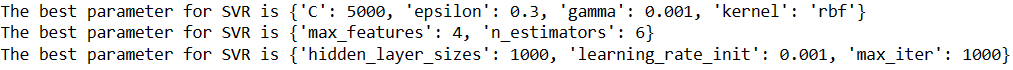

### SVR Model

In [51]:
trained_model_svr = dry_model.ml_regressors(regressor='SVR')

In [52]:
y_pred_svr = dry_model.weight_predict(trained_model_svr, X_test_scaledDry)
err_svr_dry = np.hstack((y_pred_svr, y_actual_dry))
err_svr_dry

array([[623.57741697, 609.2       ],
       [455.36179602, 466.8       ],
       [493.90222115, 492.6       ],
       [466.22407072, 451.8       ],
       [482.45183049, 523.        ],
       [228.59123226, 237.4       ],
       [160.39288472, 137.8       ],
       [156.26404698, 175.        ],
       [159.65972728, 187.4       ],
       [278.50865214, 264.6       ],
       [331.75474989, 333.4       ],
       [221.75780272, 343.        ],
       [178.44132617, 157.2       ],
       [542.13140666, 594.2       ],
       [463.34970919, 464.8       ],
       [301.77601035, 311.8       ],
       [293.98638218, 499.8       ],
       [320.07814648, 309.8       ],
       [155.39895228, 141.        ],
       [636.51443126, 700.8       ],
       [164.37358745, 208.8       ],
       [382.29857543, 334.        ]])

In [52]:
print('The Mean Absolute Error for the SVR is:', MAE(err_svr_dry))
print(f'The Percentage Error for the SVR is: {np.round(error_perc(err_svr_dry), 2)} %')

The Mean Absolute Error for the SVR is: 34.95679696967609
The Percentage Error for the SVR is: 10.37 %


### Assessing The Training Data

In [53]:
y_train_actual = dry_model.transform_label.inverse_transform(y_train_scaDry.reshape(-1, 1))

y_train_pred = dry_model.weight_predict(trained_model_svr, X_train_scaDry)
err_train = np.hstack((y_train_pred, y_train_actual))
err_train

array([[192.49031748, 178.6       ],
       [455.82249318, 436.        ],
       [302.82312545, 283.6       ],
       [188.12935126, 317.6       ],
       [528.74362293, 521.4       ],
       [440.4568168 , 382.        ],
       [153.81447394, 116.6       ],
       [646.87479928, 716.        ],
       [164.81711365, 149.4       ],
       [378.77207205, 376.8       ],
       [285.8470075 , 266.        ],
       [412.51005835, 371.6       ],
       [202.69513285, 231.2       ],
       [441.40367024, 471.6       ],
       [218.66337022, 178.        ],
       [257.66281216, 238.2       ],
       [405.70586417, 351.        ],
       [208.55148877, 197.        ],
       [188.09201059, 163.2       ],
       [388.82308389, 381.        ],
       [151.05777126, 109.4       ],
       [250.57748947, 267.8       ],
       [278.07002075, 265.        ],
       [293.4568243 , 277.8       ],
       [341.98180321, 347.4       ],
       [179.53785104,  92.        ],
       [530.84169413, 602.4       ],
 

In [54]:
print('The Mean Absolute Error for the SVR is:', MAE(err_train))
print(f'The Percentage Error for the SVR is: {np.round(error_perc(err_train), 2)} %')

The Mean Absolute Error for the SVR is: 32.53262502351097
The Percentage Error for the SVR is: 13.51 %


### RF Model

In [55]:
trained_model_rf = dry_model.ml_regressors(regressor='RF')

In [56]:
y_pred_rf = dry_model.weight_predict(trained_model_rf, X_test_scaledDry)
err_rf_dry = np.hstack((y_pred_rf, y_actual_dry))
err_rf_dry

array([[600.552, 609.2  ],
       [417.466, 466.8  ],
       [486.416, 492.6  ],
       [465.698, 451.8  ],
       [497.722, 523.   ],
       [223.64 , 237.4  ],
       [138.286, 137.8  ],
       [163.552, 175.   ],
       [175.948, 187.4  ],
       [275.504, 264.6  ],
       [324.35 , 333.4  ],
       [308.598, 343.   ],
       [212.454, 157.2  ],
       [510.806, 594.2  ],
       [454.024, 464.8  ],
       [307.664, 311.8  ],
       [434.66 , 499.8  ],
       [312.462, 309.8  ],
       [147.772, 141.   ],
       [675.918, 700.8  ],
       [197.428, 208.8  ],
       [349.488, 334.   ]])

In [57]:
print('The Mean Absolute Error for the RF is:', MAE(err_rf_dry))
print(f'The Percentage Error for the RF is: {np.round(error_perc(err_rf_dry), 2)} %')

The Mean Absolute Error for the RF is: 21.57818181818178
The Percentage Error for the RF is: 6.45 %


### MLP Model

In [58]:
trained_model_mlp = dry_model.ml_regressors(regressor='MLP')

In [59]:
y_pred_mlp = dry_model.weight_predict(trained_model_mlp, X_test_scaledDry)
err_mlp_dry = np.hstack((y_pred_mlp, y_actual_dry))
err_mlp_dry

array([[648.0918694 , 609.2       ],
       [452.85566766, 466.8       ],
       [487.72316653, 492.6       ],
       [487.52340713, 451.8       ],
       [487.48129506, 523.        ],
       [254.0102592 , 237.4       ],
       [114.50269917, 137.8       ],
       [140.91886094, 175.        ],
       [136.68316637, 187.4       ],
       [286.82435881, 264.6       ],
       [330.16668005, 333.4       ],
       [264.59617608, 343.        ],
       [196.38159836, 157.2       ],
       [546.5987078 , 594.2       ],
       [467.81335357, 464.8       ],
       [325.19568365, 311.8       ],
       [298.86116207, 499.8       ],
       [324.28555044, 309.8       ],
       [132.44884488, 141.        ],
       [656.44039493, 700.8       ],
       [164.9860916 , 208.8       ],
       [383.45951127, 334.        ]])

In [60]:
print('The Mean Absolute Error for the MLP is:', MAE(err_mlp_dry))
print(f'The Percentage Error for the MLP is: {np.round(error_perc(err_mlp_dry), 2)} %')

The Mean Absolute Error for the MLP is: 37.37830357622917
The Percentage Error for the MLP is: 11.76 %


### LR Model

In [61]:
trained_model_lr = dry_model.ml_regressors(regressor='LR')

In [62]:
y_pred_lr = dry_model.weight_predict(trained_model_lr, X_test_scaledDry)
err_lr_dry = np.hstack((y_pred_lr, y_actual_dry))
err_lr_dry

array([[622.57422725, 609.2       ],
       [431.00978439, 466.8       ],
       [460.91971681, 492.6       ],
       [483.73310983, 451.8       ],
       [464.30051829, 523.        ],
       [242.56372831, 237.4       ],
       [ 70.05131495, 137.8       ],
       [101.41334083, 175.        ],
       [ 83.36399658, 187.4       ],
       [297.61581029, 264.6       ],
       [348.97150338, 333.4       ],
       [300.92506953, 343.        ],
       [188.76623244, 157.2       ],
       [508.90955817, 594.2       ],
       [454.023584  , 464.8       ],
       [317.90835489, 311.8       ],
       [313.86660192, 499.8       ],
       [336.17469153, 309.8       ],
       [106.98508512, 141.        ],
       [638.29487048, 700.8       ],
       [154.62867203, 208.8       ],
       [375.55939076, 334.        ]])

In [60]:
print('The Mean Absolute Error for the MLP is:', MAE(err_lr_dry))
print(f'The Percentage Error for the MLP is: {np.round(error_perc(err_lr_dry), 2)} %')

The Mean Absolute Error for the MLP is: 47.7715879819528
The Percentage Error for the MLP is: 16.76 %


### Combining the model together

In [35]:
def robust_model(data, nature='wet', rand=30, default=True):
    """Train and predict Weights using the Four Regressors Model.
    
    Param
    ------
    Data: DataFrame containing the independent and dependent variables.
    nature: Determines the weight to train either wet or dry
    rand: Used for cross validation to randomize the training data.
    
    returns:
    DataFrames of the model training of the test dataset and the error analysis.
    """
    independent_var = data[['length(cm)', 'circumference(cm)', 'width(cm)']]
    
    if nature.lower() == 'wet':
        response_var = data['wet_weight(g)']
    else:
        response_var = data['dry weight(g)']

    model = WeightModel(feature = independent_var, 
                            label = response_var, 
                            test_fraction = 0.2)
    
    # Splitting the dataset
    X_train_sca, X_test_scaled, y_train_sca, y_test = model.dataset_scaler(rand_num=rand)
    # Transform the y_test dataset to be used for validation
    y_actual = model.transform_label.inverse_transform(y_test.reshape(-1, 1))
    
    # Training the model using the four regressor algorithms
    svr_model = model.ml_regressors(regressor='SVR', default=default)
    rf_model = model.ml_regressors(regressor='RF', default=default)
    mlp_model = model.ml_regressors(regressor='MLP', default=default)
    lr_model = model.ml_regressors(regressor='LR', default=default)
    
    # Check RESIDUAL to see how the model behaves with the training dataset
    y_train_calc_svr = model.weight_predict(svr_model, X_train_sca)
    y_train_calc_rf = model.weight_predict(rf_model, X_train_sca)
    y_train_calc_mlp = model.weight_predict(mlp_model, X_train_sca)
    y_train_calc_lr = model.weight_predict(lr_model, X_train_sca)
    # obtaining the actual training y_val
    ytrain = model.transform_label.inverse_transform(y_train_sca.reshape(-1, 1))
    
    train_pred_stacked = np.hstack((ytrain, y_train_calc_svr, y_train_calc_rf, y_train_calc_mlp, y_train_calc_lr))
    residual_df = pd.DataFrame(train_pred_stacked, columns=['y_train', 'SVR_pred', 'RF_pred', 'MLP_pred', 'LR_pred'])
    
    # Predicting the test variables
    y_pred_svr = model.weight_predict(svr_model, X_test_scaled)
    y_pred_rf = model.weight_predict(rf_model, X_test_scaled)
    y_pred_mlp = model.weight_predict(mlp_model, X_test_scaled)
    y_pred_lr = model.weight_predict(lr_model, X_test_scaled)
    
    # Combining the prediction and creating a dataframe of all the regressor algorithms.
    err_stack = np.hstack((y_actual, y_pred_svr, y_pred_rf, y_pred_mlp, y_pred_lr))
    prediction_df = pd.DataFrame(err_stack, columns=['y_test', 'SVR_pred', 'RF_pred', 'MLP_pred', 'LR_pred'])
    
    # Combining the error and creating a dataframe
    MAE_stack = np.vstack((
        MAE(np.hstack((y_actual, y_pred_svr))),
        MAE(np.hstack((y_actual, y_pred_rf))),
        MAE(np.hstack((y_actual, y_pred_mlp))),
        MAE(np.hstack((y_actual, y_pred_lr))),
    ))
    
    MAE_df = pd.DataFrame(MAE_stack.T, columns=['SVR MAE', 'RF MAE', 'MLP MAE', 'LR MAE'])
    
    return prediction_df, MAE_df, residual_df

## K-FOLD CROSSVALIDATION (WET WEIGHT)

rand = 20

In [36]:
pred_df, mae_df, res_df_wet = robust_model(new_bdata, rand=5, nature='dry')
pred_df

,y_test,SVR_pred,RF_pred,MLP_pred,LR_pred
0,436.0,455.822493,446.822,463.131242,435.871908
1,266.0,285.847008,286.052,290.983141,300.660231
2,237.4,228.591232,230.776,239.764878,242.563728
3,544.6,533.811602,521.746,522.483402,524.150215
4,333.4,331.754750,318.438,319.617699,348.971503
5,171.4,156.988723,169.392,153.810173,140.066617
6,149.4,164.817114,164.850,182.371576,161.376068
7,280.2,217.166730,237.260,240.419788,245.869575
8,185.4,199.718590,201.210,215.640049,227.729617
9,209.8,223.316781,215.612,218.224197,246.497924


In [174]:
mae_df

,SVR MAE,RF MAE,MLP MAE,LR MAE
0,19.270448,12.482727,24.925653,26.398836


In [175]:
print('The Percentage Error for the SVR is:', np.round(error_perc_pandas(pred_df[['y_test', 'SVR_pred']], reg='SVR'), 2),'%')
print('The Percentage Error for the RF is:', np.round(error_perc_pandas(pred_df[['y_test', 'RF_pred']], reg='RF'), 2),'%')
print('The Percentage Error for the MLP is:', np.round(error_perc_pandas(pred_df[['y_test', 'MLP_pred']], reg='MLP'), 2),'%')
print('The Percentage Error for the LR is:', np.round(error_perc_pandas(pred_df[['y_test', 'LR_pred']], reg='LR'), 2),'%')

The Percentage Error for the SVR is: 8.27 %
The Percentage Error for the RF is: 5.08 %
The Percentage Error for the MLP is: 11.3 %
The Percentage Error for the LR is: 10.79 %


In [41]:
def error_perc_pandas(pandas_arr, reg):
    return np.mean(np.abs((pandas_arr['y_test'] - pandas_arr[f'{reg}_pred']) / pandas_arr['y_test']) *100)

rand = 5

In [60]:
pred_df2, mae_df2, res_df_wet2 = robust_model(new_bdata, default=True, rand=5)
pred_df2

,y_test,SVR_pred,RF_pred,MLP_pred,LR_pred
0,834.0,806.117455,776.66,811.344339,769.105408
1,476.0,511.098073,512.02,492.538004,512.259849
2,442.0,384.641220,409.34,394.678986,404.386283
3,964.0,947.295259,922.26,935.465991,909.461803
4,590.0,591.511430,587.08,560.909577,598.750550
5,256.0,229.650971,269.34,166.921342,191.411962
6,304.0,241.217174,203.98,276.485006,242.920360
7,484.0,382.627936,403.88,385.343342,399.153753
8,344.0,330.345363,363.94,350.094756,357.045344
9,384.0,364.410318,391.18,371.246457,395.335065


In [61]:
print('The Percentage Error for the SVR is:', np.round(error_perc_pandas(pred_df2[['y_test', 'SVR_pred']], reg='SVR'), 2),'%')
print('The Percentage Error for the RF is:', np.round(error_perc_pandas(pred_df2[['y_test', 'RF_pred']], reg='RF'), 2),'%')
print('The Percentage Error for the MLP is:', np.round(error_perc_pandas(pred_df2[['y_test', 'MLP_pred']], reg='MLP'), 2),'%')
print('The Percentage Error for the LR is:', np.round(error_perc_pandas(pred_df2[['y_test', 'LR_pred']], reg='LR'), 2),'%')

The Percentage Error for the SVR is: 9.08 %
The Percentage Error for the RF is: 6.91 %
The Percentage Error for the MLP is: 10.35 %
The Percentage Error for the LR is: 10.63 %


In [62]:
mae_df2

,SVR MAE,RF MAE,MLP MAE,LR MAE
0,34.007095,31.066364,38.971218,41.964403


In [63]:
pred_df2[['y_test', 'SVR_pred']]

,y_test,SVR_pred
0,834.0,806.117455
1,476.0,511.098073
2,442.0,384.641220
3,964.0,947.295259
4,590.0,591.511430
5,256.0,229.650971
6,304.0,241.217174
7,484.0,382.627936
8,344.0,330.345363
9,384.0,364.410318


In [64]:
error_perc_pandas(pred_df2[['y_test', 'SVR_pred']], reg='SVR')

9.075281951709808

In [76]:
print('The Percentage Error for the SVR is:', np.round(error_perc_pandas(pred_df2[['y_test', 'SVR_pred']], reg='SVR'), 2),'%')
print('The Percentage Error for the RF is:', np.round(error_perc_pandas(pred_df2[['y_test', 'RF_pred']], reg='RF'), 2),'%')
print('The Percentage Error for the MLP is:', np.round(error_perc_pandas(pred_df2[['y_test', 'MLP_pred']], reg='MLP'), 2),'%')
print('The Percentage Error for the LR is:', np.round(error_perc_pandas(pred_df2[['y_test', 'LR_pred']], reg='LR'), 2),'%')

The Percentage Error for the SVR is: 9.08 %
The Percentage Error for the RF is: 6.44 %
The Percentage Error for the MLP is: 9.4 %
The Percentage Error for the LR is: 10.63 %


In [46]:
pred_df2, mae_df2, res_df_wet2 = robust_model(new_bdata, default=True, rand=5)
pred_df2

,y_test,SVR_pred,RF_pred,MLP_pred,LR_pred
0,834.0,806.117455,784.94,819.394218,769.105408
1,476.0,511.098073,509.72,491.800608,512.259849
2,442.0,384.641220,387.30,414.551144,404.386283
3,964.0,947.295259,936.98,918.633162,909.461803
4,590.0,591.511430,596.48,549.892468,598.750550
5,256.0,229.650971,256.30,200.990431,191.411962
6,304.0,241.217174,210.96,281.406282,242.920360
7,484.0,382.627936,418.38,389.147469,399.153753
8,344.0,330.345363,356.42,342.839008,357.045344
9,384.0,364.410318,375.52,359.253503,395.335065


In [47]:
print('The Percentage Error for the SVR is:', np.round(error_perc_pandas(pred_df2[['y_test', 'SVR_pred']], reg='SVR'), 2),'%')
print('The Percentage Error for the RF is:', np.round(error_perc_pandas(pred_df2[['y_test', 'RF_pred']], reg='RF'), 2),'%')
print('The Percentage Error for the MLP is:', np.round(error_perc_pandas(pred_df2[['y_test', 'MLP_pred']], reg='MLP'), 2),'%')
print('The Percentage Error for the LR is:', np.round(error_perc_pandas(pred_df2[['y_test', 'LR_pred']], reg='LR'), 2),'%')

The Percentage Error for the SVR is: 9.08 %
The Percentage Error for the RF is: 5.99 %
The Percentage Error for the MLP is: 9.77 %
The Percentage Error for the LR is: 10.63 %


In [48]:
pred_df2

,y_test,SVR_pred,RF_pred,MLP_pred,LR_pred
0,834.0,806.117455,784.94,819.394218,769.105408
1,476.0,511.098073,509.72,491.800608,512.259849
2,442.0,384.641220,387.30,414.551144,404.386283
3,964.0,947.295259,936.98,918.633162,909.461803
4,590.0,591.511430,596.48,549.892468,598.750550
5,256.0,229.650971,256.30,200.990431,191.411962
6,304.0,241.217174,210.96,281.406282,242.920360
7,484.0,382.627936,418.38,389.147469,399.153753
8,344.0,330.345363,356.42,342.839008,357.045344
9,384.0,364.410318,375.52,359.253503,395.335065


Text(0.5, 0, 'Test Data')

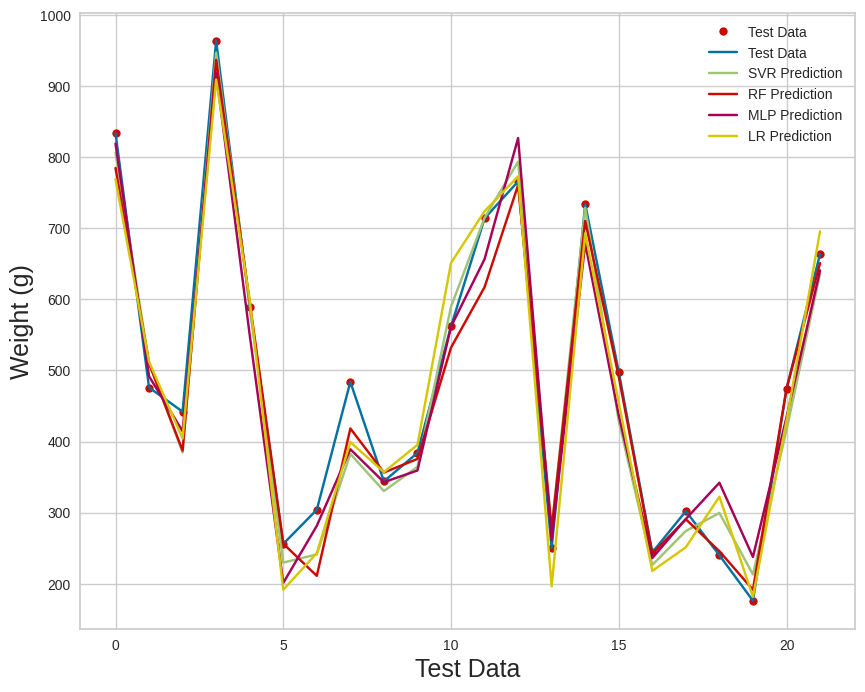

In [49]:
plt.figure(figsize=(10, 8))
plt.plot(pred_df2['y_test'], 'r.', markersize=12, label='Test Data')
plt.plot(pred_df2['y_test'], label='Test Data')
plt.plot(pred_df2['SVR_pred'], label='SVR Prediction')
plt.plot(pred_df2['RF_pred'], label='RF Prediction')
plt.plot(pred_df2['MLP_pred'], label='MLP Prediction')
plt.plot(pred_df2['LR_pred'], label='LR Prediction')
plt.legend()
plt.ylabel('Weight (g)', fontsize=18)
plt.xlabel('Test Data', fontsize=18)

#### WET WEIGHT - Using the Optimized Parameters

rand = 20

In [67]:
pred_df2, mae_df2, res_df_wet2 = robust_model(new_bdata, default=True, rand=20)
pred_df2

,y_test,SVR_pred,RF_pred,MLP_pred,LR_pred
0,562.0,589.785218,542.92,582.616830,651.324979
1,1190.0,1162.298331,1131.14,1211.592875,1112.762099
2,168.0,205.906811,185.84,194.838847,142.189572
3,348.0,512.296390,406.00,497.734083,521.451389
4,474.0,416.287627,482.34,414.051540,429.231753
5,748.0,723.805726,693.48,692.936905,751.618260
6,256.0,229.650971,262.54,254.143699,191.411962
7,446.0,418.097648,439.88,438.943915,430.845565
8,484.0,382.627936,413.78,393.621450,399.153753
9,136.0,225.798849,213.38,220.510729,100.131365


In [68]:
mae_df2

,SVR MAE,RF MAE,MLP MAE,LR MAE
0,52.620904,43.73,56.45271,65.335711


In [69]:
print('The Percentage Error for the SVR is:', np.round(error_perc_pandas(pred_df2[['y_test', 'SVR_pred']], reg='SVR'), 2),'%')
print('The Percentage Error for the RF is:', np.round(error_perc_pandas(pred_df2[['y_test', 'RF_pred']], reg='RF'), 2),'%')
print('The Percentage Error for the MLP is:', np.round(error_perc_pandas(pred_df2[['y_test', 'MLP_pred']], reg='MLP'), 2),'%')
print('The Percentage Error for the LR is:', np.round(error_perc_pandas(pred_df2[['y_test', 'LR_pred']], reg='LR'), 2),'%')

The Percentage Error for the SVR is: 16.14 %
The Percentage Error for the RF is: 10.66 %
The Percentage Error for the MLP is: 15.73 %
The Percentage Error for the LR is: 16.31 %


## ! As seen from the above results that the hyperparameter tuning parameters do help to increase the accuracy.

rand = 300

In [70]:
pred_df2, mae_df2, res_df_wet2 = robust_model(new_bdata, default=True, rand=300)
pred_df2

,y_test,SVR_pred,RF_pred,MLP_pred,LR_pred
0,218.0,236.942395,256.74,236.331995,224.021146
1,844.0,741.530524,781.82,771.452013,806.642513
2,816.0,844.881892,808.14,844.458092,816.703369
3,230.0,242.754358,234.28,203.645739,216.530541
4,678.0,752.221792,693.66,706.684829,705.039558
5,474.0,416.287627,470.34,414.341170,429.231753
6,326.0,253.129911,314.40,292.045002,241.776224
7,380.0,433.795263,457.54,411.862006,428.805412
8,252.0,327.965962,321.12,315.329970,393.531071
9,496.0,523.894087,504.04,506.311052,545.678396


In [71]:
mae_df2

,SVR MAE,RF MAE,MLP MAE,LR MAE
0,42.208557,28.956364,42.315682,48.092013


In [72]:
print('The Percentage Error for the SVR is:', np.round(error_perc_pandas(pred_df2[['y_test', 'SVR_pred']], reg='SVR'), 2),'%')
print('The Percentage Error for the RF is:', np.round(error_perc_pandas(pred_df2[['y_test', 'RF_pred']], reg='RF'), 2),'%')
print('The Percentage Error for the MLP is:', np.round(error_perc_pandas(pred_df2[['y_test', 'MLP_pred']], reg='MLP'), 2),'%')
print('The Percentage Error for the LR is:', np.round(error_perc_pandas(pred_df2[['y_test', 'LR_pred']], reg='LR'), 2),'%')

The Percentage Error for the SVR is: 10.92 %
The Percentage Error for the RF is: 6.99 %
The Percentage Error for the MLP is: 10.68 %
The Percentage Error for the LR is: 13.08 %


rand = 2

In [74]:
pred_df2, mae_df2, res_df_wet2 = robust_model(new_bdata, default=True, rand=2)
pred_df2

,y_test,SVR_pred,RF_pred,MLP_pred,LR_pred
0,362.0,407.177992,396.94,402.233741,435.330720
1,738.0,709.232400,703.76,665.150344,679.245133
2,558.0,571.935564,541.76,531.342548,573.988736
3,446.0,418.097648,427.44,419.457899,430.845565
4,570.0,551.405087,507.38,533.044421,541.171981
5,324.0,351.737193,391.04,358.410168,323.347435
6,416.0,343.097306,392.20,307.592391,376.552229
7,230.0,221.967873,230.52,228.807733,194.706847
8,344.0,330.345363,353.16,330.296306,357.045344
9,190.0,298.380278,255.52,260.163220,308.933491


In [75]:
mae_df2

,SVR MAE,RF MAE,MLP MAE,LR MAE
0,53.600068,45.53,51.145799,58.819793


rand = 100

In [76]:
pred_df2, mae_df2, res_df_wet2 = robust_model(new_bdata, default=False, rand=100)
pred_df2

,y_test,SVR_pred,RF_pred,MLP_pred,LR_pred
0,814.0,772.425130,689.6,822.765470,762.053125
1,626.0,819.465516,634.4,855.705398,803.723391
2,558.0,568.834563,564.8,571.749489,573.988736
3,642.0,597.403545,601.6,606.660042,594.475439
4,1026.0,979.533808,976.0,924.106276,904.012162
5,362.0,449.976440,392.8,419.116411,448.522195
6,466.0,608.501859,466.0,620.031325,612.331250
7,248.0,248.192238,297.6,286.520487,202.195856
8,498.0,776.607859,498.0,772.024265,759.643034
9,680.0,537.282672,655.6,545.466964,548.436406


In [77]:
mae_df2

,SVR MAE,RF MAE,MLP MAE,LR MAE
0,74.442004,31.981818,80.839651,98.446471


In [78]:
pred_df2, mae_df2, res_df_wet2 = robust_model(new_bdata, default=False, rand=100)

In [79]:
mae_df2

,SVR MAE,RF MAE,MLP MAE,LR MAE
0,74.442004,47.363636,80.839651,98.446471


## Calculating the Residual of the Model

In [37]:
def plot_residual(actual_train, predicted_train):
    plt.plot((predicted_train - actual_train), 'r*')
    plt.ylabel('Delta (g)', fontsize=13)
    plt.xlabel('Data', fontsize=13)

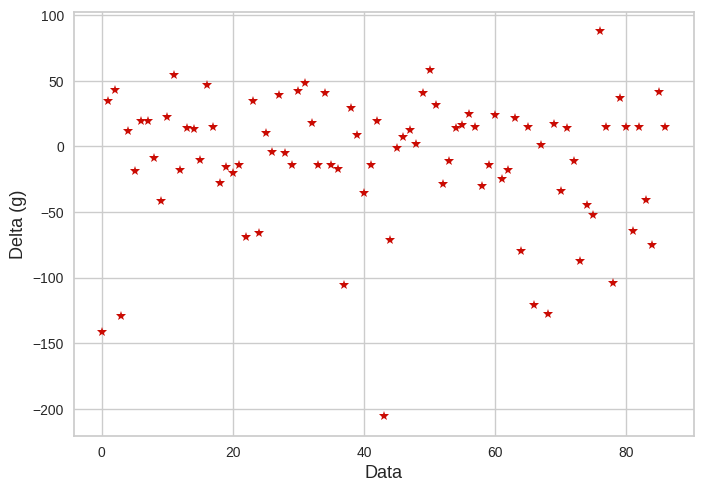

In [38]:
plot_residual(res_df_wet['y_train'], res_df_wet['SVR_pred'])

---

#### DRY WEIGHT

In [39]:
pred_df_dry, mae_df_dry, residual_dry = robust_model(new_bdata, nature='dry', rand=5)
pred_df_dry

,y_test,SVR_pred,RF_pred,MLP_pred,LR_pred
0,436.0,455.822493,454.456,472.553443,435.871908
1,266.0,285.847008,286.824,295.457604,300.660231
2,237.4,228.591232,232.168,243.623547,242.563728
3,544.6,533.811602,529.828,523.628317,524.150215
4,333.4,331.754750,321.688,313.132725,348.971503
5,171.4,156.988723,169.228,166.747821,140.066617
6,149.4,164.817114,162.270,187.688872,161.376068
7,280.2,217.166730,231.434,235.820380,245.869575
8,185.4,199.718590,206.300,208.089563,227.729617
9,209.8,223.316781,216.680,204.275184,246.497924


In [42]:
print('The Percentage Error for the SVR is:', np.round(error_perc_pandas(pred_df_dry[['y_test', 'SVR_pred']], reg='SVR'), 2),'%')
print('The Percentage Error for the RF is:', np.round(error_perc_pandas(pred_df_dry[['y_test', 'RF_pred']], reg='RF'), 2),'%')
print('The Percentage Error for the MLP is:', np.round(error_perc_pandas(pred_df_dry[['y_test', 'MLP_pred']], reg='MLP'), 2),'%')
print('The Percentage Error for the LR is:', np.round(error_perc_pandas(pred_df_dry[['y_test', 'LR_pred']], reg='LR'), 2),'%')

The Percentage Error for the SVR is: 8.27 %
The Percentage Error for the RF is: 5.35 %
The Percentage Error for the MLP is: 11.7 %
The Percentage Error for the LR is: 10.79 %


In [78]:
print(f'The Percentage Error for the SVR is: {np.round(error_perc(err_train), 2)} %')

The Percentage Error for the SVR is: 13.51 %


In [79]:
mae_df_dry

,SVR MAE,RF MAE,MLP MAE,LR MAE
0,19.270448,14.576455,26.206366,26.398836


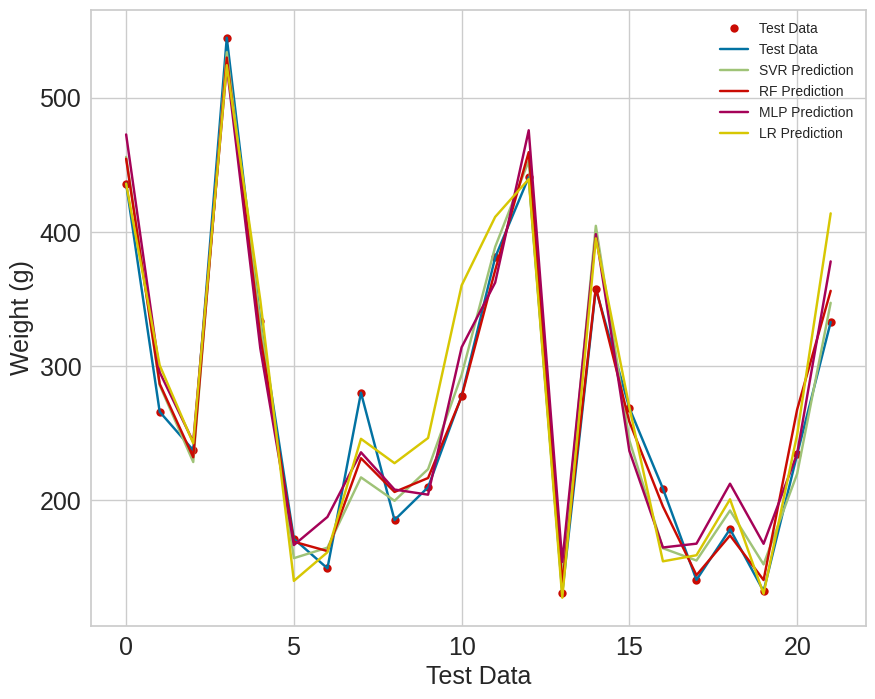

In [44]:
plt.figure(figsize=(10, 8))
plt.plot(pred_df_dry['y_test'], 'r.', markersize=12, label='Test Data')
plt.plot(pred_df_dry['y_test'], label='Test Data')
plt.plot(pred_df_dry['SVR_pred'], label='SVR Prediction')
plt.plot(pred_df_dry['RF_pred'], label='RF Prediction')
plt.plot(pred_df_dry['MLP_pred'], label='MLP Prediction')
plt.plot(pred_df_dry['LR_pred'], label='LR Prediction')
plt.ylabel('Weight (g)', fontsize=18)
plt.xlabel('Test Data', fontsize=18)
plt.xticks(size=18)
plt.yticks(size=18)
plt.legend()

Text(0.5, 0, 'Test Data')

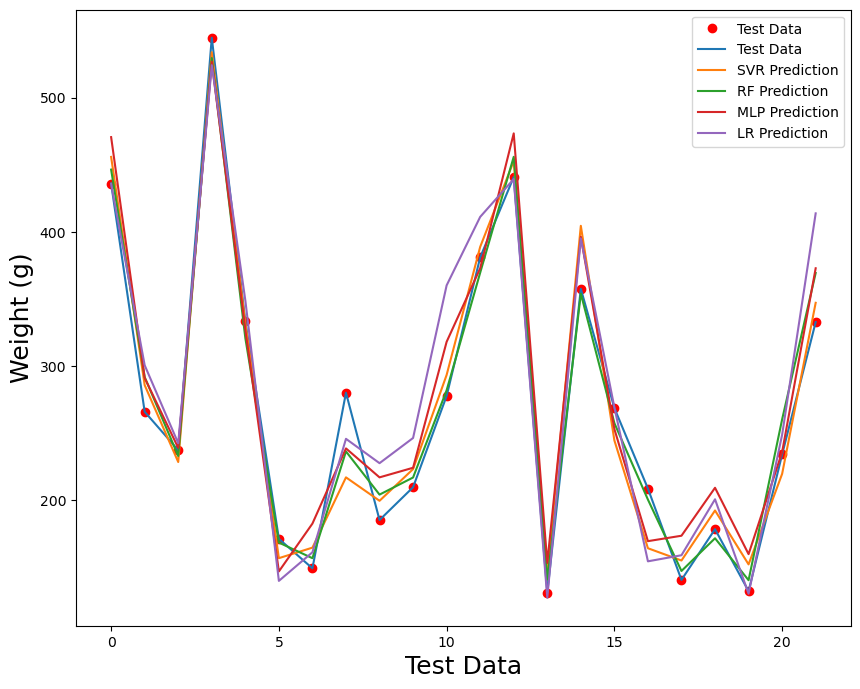

In [85]:
plt.figure(figsize=(10, 8))
plt.plot(pred_df_dry['y_test'], 'r.', markersize=12, label='Test Data')
plt.plot(pred_df_dry['y_test'], label='Test Data')
plt.plot(pred_df_dry['SVR_pred'], label='SVR Prediction')
plt.plot(pred_df_dry['RF_pred'], label='RF Prediction')
plt.plot(pred_df_dry['MLP_pred'], label='MLP Prediction')
plt.plot(pred_df_dry['LR_pred'], label='LR Prediction')
plt.ylabel('Weight (g)', fontsize=18)
plt.xlabel('Test Data', fontsize=18)
plt.legend()

### Plotting the residual to confirm the data is not overfitting

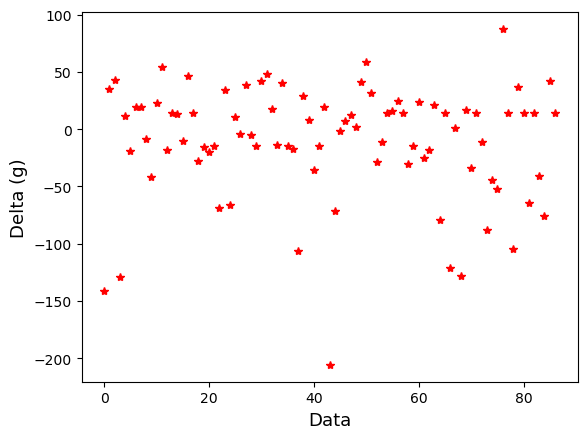

In [86]:
# SVR
plot_residual(residual_dry['y_train'], residual_dry['SVR_pred'])

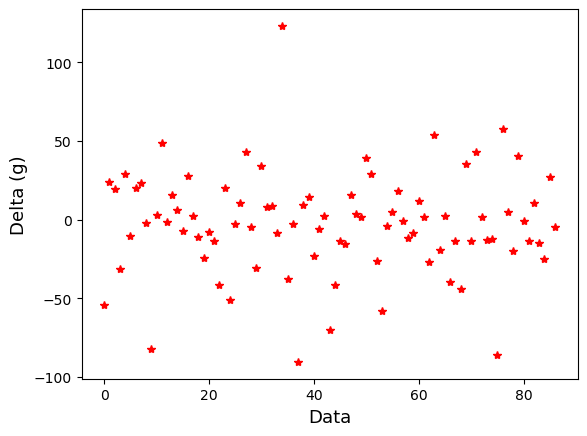

In [87]:
# RF
plot_residual(residual_dry['y_train'], residual_dry['RF_pred'])

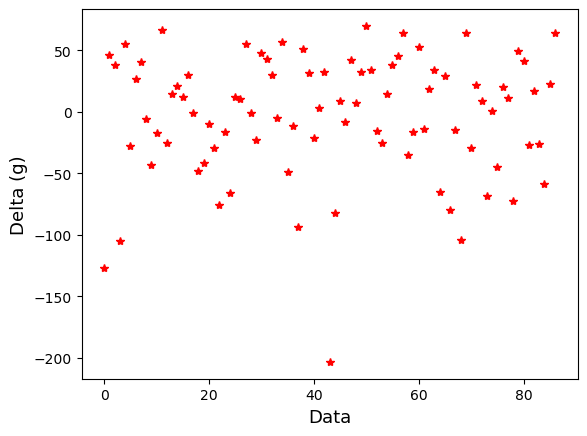

In [88]:
# MLP
plot_residual(residual_dry['y_train'], residual_dry['MLP_pred'])

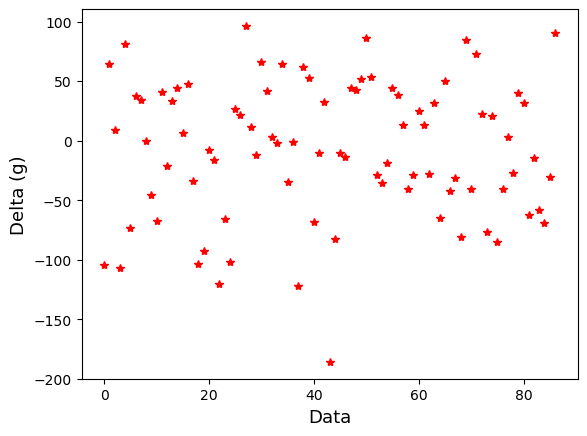

In [89]:
# LR
plot_residual(residual_dry['y_train'], residual_dry['LR_pred'])

In [75]:
# Using the optimized parameters
# SVR
kern ='rbf'
c_val = 5000
gam_val = 0.001
eps_val = 0.3

# RF 
n_est = 4
max_featR = 6

# MLP
hid_lay = 1000
tol = 0.001
max_i = 1000

#### DRY MODEL - Using the Optimized Parameters

In [76]:
pred_df2, mae_df2, residual_dr_2 = robust_model(new_bdata, default=False, nature='dry', rand=20)
pred_df2

,y_test,SVR_pred,RF_pred,MLP_pred,LR_pred
0,277.8,320.936656,281.95,323.152071,360.146701
1,609.2,688.598802,543.30,620.149300,622.574227
2,104.6,135.576792,124.70,149.945011,113.109308
3,265.6,306.560262,270.55,327.825163,309.744936
4,234.2,243.774278,270.10,223.695441,248.926423
5,376.8,395.918895,358.60,383.136521,418.965824
6,171.4,131.568051,160.20,202.282936,140.066617
7,217.2,260.203161,238.40,293.569504,261.660366
8,280.2,247.162103,245.35,260.453817,245.869575
9,109.4,138.075009,145.25,96.373674,78.757681


In [78]:
mae_df2

,SVR MAE,RF MAE,MLP MAE,LR MAE
0,36.896232,33.481818,39.602493,38.668612


In [77]:
print('The Percentage Error for the SVR is:', np.round(error_perc_pandas(pred_df2[['y_test', 'SVR_pred']], reg='SVR'), 2),'%')
print('The Percentage Error for the RF is:', np.round(error_perc_pandas(pred_df2[['y_test', 'RF_pred']], reg='RF'), 2),'%')
print('The Percentage Error for the MLP is:', np.round(error_perc_pandas(pred_df2[['y_test', 'MLP_pred']], reg='MLP'), 2),'%')
print('The Percentage Error for the LR is:', np.round(error_perc_pandas(pred_df2[['y_test', 'LR_pred']], reg='LR'), 2),'%')

The Percentage Error for the SVR is: 15.44 %
The Percentage Error for the RF is: 11.52 %
The Percentage Error for the MLP is: 17.69 %
The Percentage Error for the LR is: 15.76 %


## As seen from the above that the hyperparameter tuning do not increase the validity of the result

Text(0.5, 0, 'Test Data')

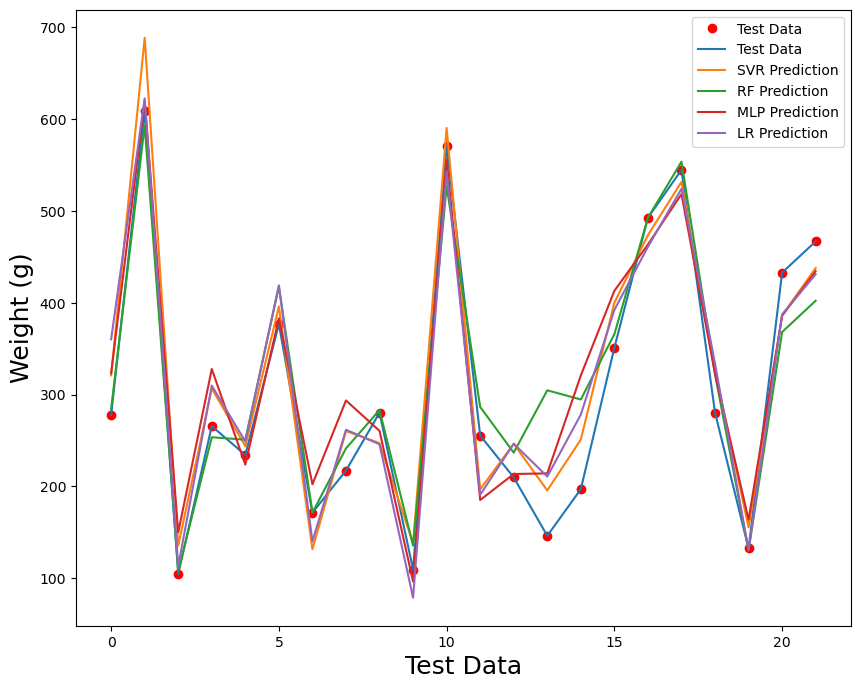

In [93]:
plt.figure(figsize=(10, 8))
plt.plot(pred_df2['y_test'], 'r.', markersize=12, label='Test Data')
plt.plot(pred_df2['y_test'], label='Test Data')
plt.plot(pred_df2['SVR_pred'], label='SVR Prediction')
plt.plot(pred_df2['RF_pred'], label='RF Prediction')
plt.plot(pred_df2['MLP_pred'], label='MLP Prediction')
plt.plot(pred_df2['LR_pred'], label='LR Prediction')
plt.legend()
plt.ylabel('Weight (g)', fontsize=18)
plt.xlabel('Test Data', fontsize=18)

# #3: REDUCING THE DATA AND REMOVING THE VERY LARGE WEIGHT

In [94]:
biomass_data.shape, biomass_data_new.shape, new_bdata.shape

((113, 8), (110, 8), (109, 8))

In [95]:
new_bdata.columns

Index(['Wood ID', 'length(cm)', 'circumference(cm)', 'width(cm)',
       'wet_weight(g)', 'dry weight(g)', 'width(mm)', 'Estimated Pie'],
      dtype='object')

In [97]:
used_features = ['length(cm)', 'circumference(cm)', 'width(cm)', 'wet_weight(g)', 'dry weight(g)']

#### Copy the new_bdata

In [98]:
final_bdata = new_bdata.copy()

In [99]:
final_bdata.shape

(109, 8)

<Axes: >

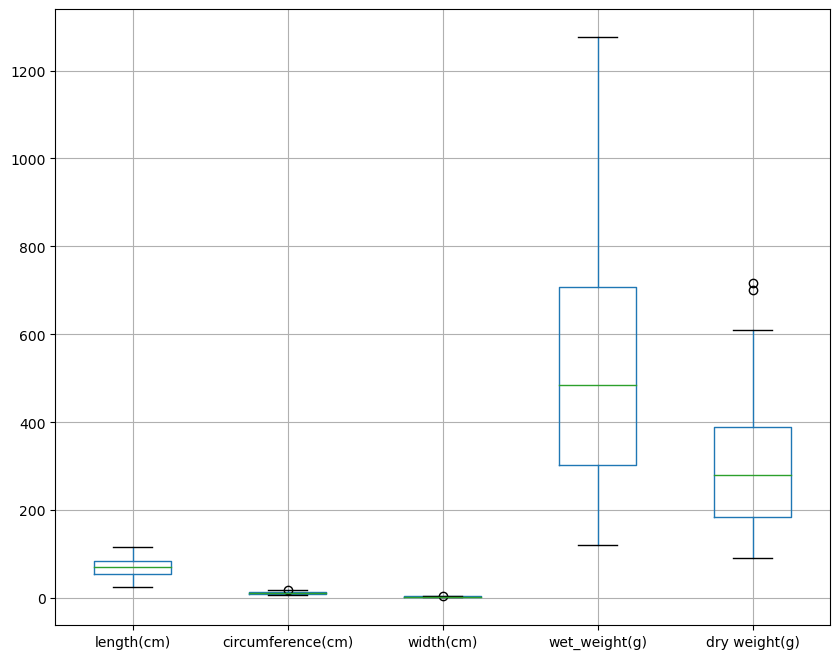

In [100]:
plt.figure(figsize=(10, 8))
final_bdata.boxplot(used_features)

### Performing Interquantile Range (IQR)[ Q1-Q3] Band to check for outlier and remove

In [101]:
for x in ['dry weight(g)']:
    q75,q25 = np.percentile(final_bdata.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    final_bdata.loc[final_bdata[x] < min,x] = np.nan
    final_bdata.loc[final_bdata[x] > max,x] = np.nan

In [102]:
final_bdata.isnull().sum()

Wood ID              0
length(cm)           0
circumference(cm)    0
width(cm)            0
wet_weight(g)        0
dry weight(g)        2
width(mm)            0
Estimated Pie        0
dtype: int64

In [103]:
final_bdata = final_bdata.dropna(axis = 0)
final_bdata.shape

(107, 8)

### Wet Weight

In [104]:
final_wet_pred, final_wet_mae, final_wet_res = robust_model(final_bdata, default=False, rand=20)
final_wet_pred

,y_test,SVR_pred,RF_pred,MLP_pred,LR_pred
0,348.0,487.214146,348.0,501.789141,522.336248
1,220.0,196.190251,248.5,202.467104,144.518536
2,748.0,717.091594,748.0,732.705841,751.372583
3,1190.0,1242.526301,1190.0,1167.646196,1091.057265
4,302.0,301.694226,317.0,300.582400,265.526107
5,252.0,284.351037,398.5,255.642174,378.670460
6,446.0,402.344222,421.5,414.634647,437.713073
7,168.0,177.242088,185.5,177.337678,154.603706
8,1194.0,962.982998,1014.0,988.729372,913.633444
9,190.0,268.801087,251.0,245.278057,298.590418


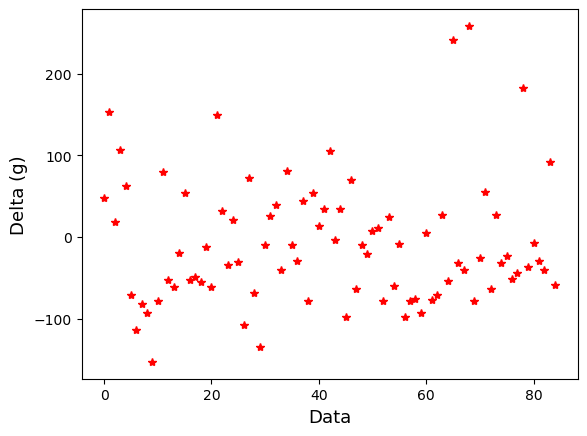

In [109]:
plot_residual(final_wet_res['y_train'], final_wet_res['SVR_pred'])

In [105]:
final_wet_mae

,SVR MAE,RF MAE,MLP MAE,LR MAE
0,62.594761,65.613636,57.235322,78.315384


### Dry Weight

#### Default Values

In [110]:
final_dry_pred, final_dry_mae, final_dry_res = robust_model(final_bdata, nature='dry', rand=5)
final_dry_pred

,y_test,SVR_pred,RF_pred,MLP_pred,LR_pred
0,197.0,207.836511,236.656,247.668113,278.876025
1,266.0,287.020183,292.380,303.032958,302.265064
2,237.4,228.921731,220.862,248.457312,248.318176
3,544.6,531.106631,528.858,504.436296,502.924539
4,223.6,162.867458,208.008,158.629183,133.613708
5,171.4,157.951533,174.048,159.724956,152.001951
6,149.4,162.826188,165.666,191.412402,171.573183
7,280.2,216.218391,264.692,253.797386,248.797536
8,185.4,194.062880,197.358,224.031064,227.075477
9,141.0,161.139302,156.094,129.218238,116.372128


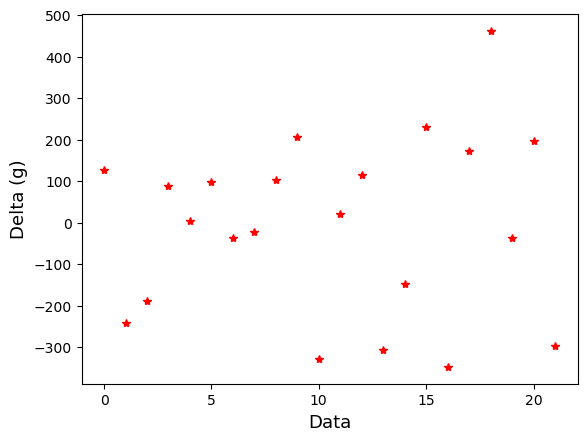

In [111]:
plot_residual(pred_df_dry['y_test'], final_dry_res['RF_pred'])

In [107]:
final_dry_mae

,SVR MAE,RF MAE,MLP MAE,LR MAE
0,26.668589,17.341818,31.597664,38.733716


Text(0.5, 0, 'Test Data')

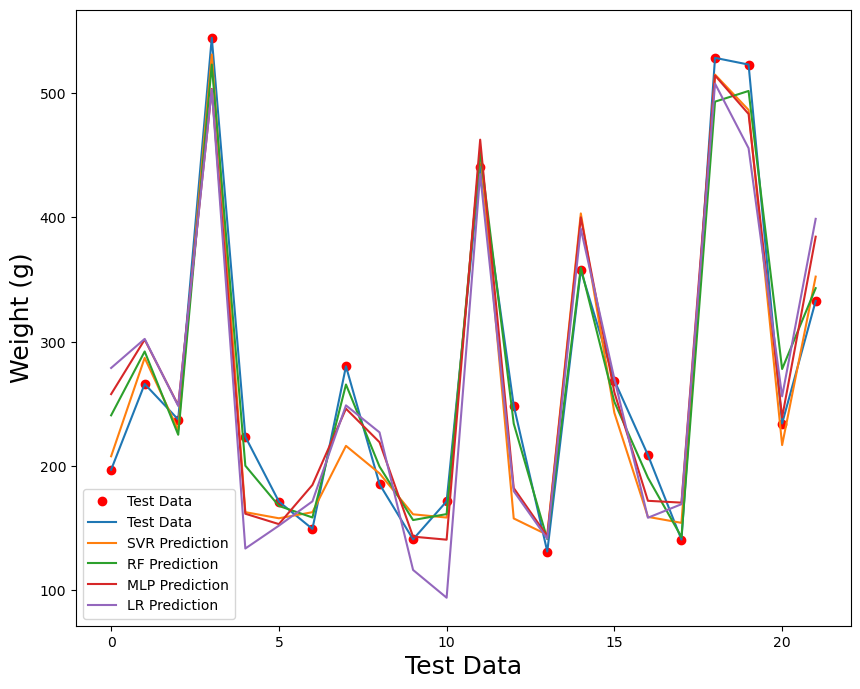

In [108]:
plt.figure(figsize=(10, 8))
plt.plot(final_dry_pred['y_test'], 'r.', markersize=12, label='Test Data')
plt.plot(final_dry_pred['y_test'], label='Test Data')
plt.plot(final_dry_pred['SVR_pred'], label='SVR Prediction')
plt.plot(final_dry_pred['RF_pred'], label='RF Prediction')
plt.plot(final_dry_pred['MLP_pred'], label='MLP Prediction')
plt.plot(final_dry_pred['LR_pred'], label='LR Prediction')
plt.legend()
plt.ylabel('Weight (g)', fontsize=18)
plt.xlabel('Test Data', fontsize=18)

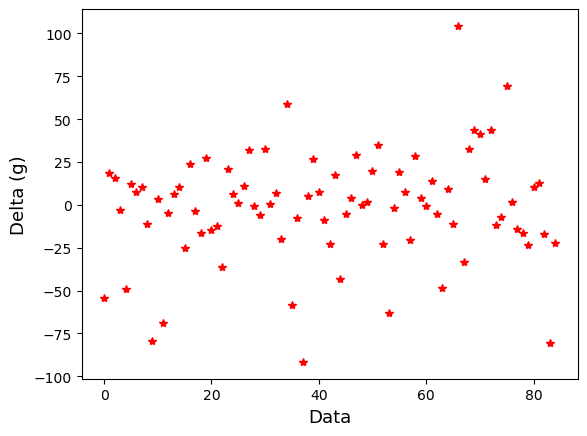

In [109]:
plot_residual(final_dry_res['y_train'], final_dry_res['RF_pred'])

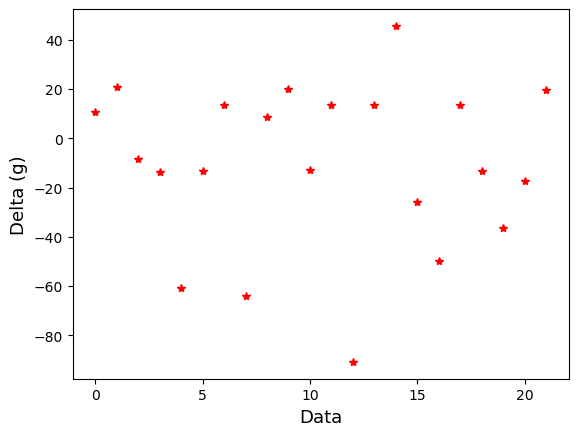

In [110]:
plot_residual(final_dry_pred['y_test'], final_dry_pred['SVR_pred'])

In [111]:
final_dry_pred, final_dry_mae, final_dry_res = robust_model(final_bdata, default=False, nature='dry', rand=20)
final_dry_pred

,y_test,SVR_pred,RF_pred,MLP_pred,LR_pred
0,265.6,302.922308,275.80,325.107976,309.393420
1,175.0,148.514526,175.00,124.898336,114.596778
2,376.8,385.373005,392.25,385.929875,414.678469
3,609.2,683.824590,583.60,615.531939,602.220591
4,140.8,181.246140,201.75,143.264242,169.292506
5,189.0,188.595632,189.00,279.744791,254.069437
6,217.2,259.435126,196.75,289.787179,265.973847
7,104.6,142.460851,136.55,144.835929,124.029945
8,594.2,535.385237,542.35,521.100492,502.085733
9,146.2,194.019373,192.25,208.281654,206.278717


In [112]:
final_dry_mae

,SVR MAE,RF MAE,MLP MAE,LR MAE
0,49.418629,29.984091,56.329601,58.175108


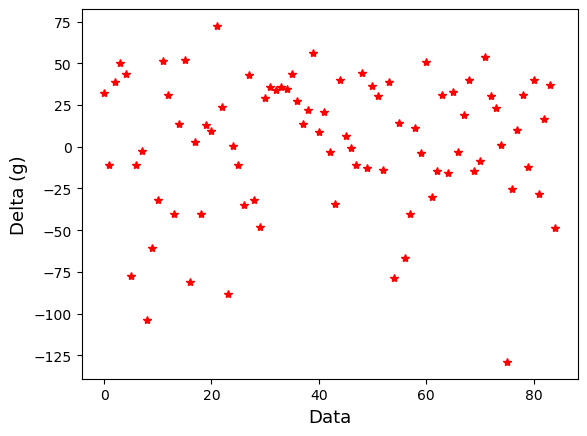

In [113]:
plot_residual(final_dry_res['y_train'], final_dry_res['SVR_pred'])

In [114]:
reduced_bdata = biomass_data_new[(biomass_data_new['width(cm)'] < 4.5) & (biomass_data_new['dry weight(g)'] <= 500)]

In [115]:
reduced_bdata.shape

(92, 8)

In [116]:
pred_df3, mae_df3, residual = robust_model(reduced_bdata, default=False, nature='dry', rand=20)
pred_df3

,y_test,SVR_pred,RF_pred,MLP_pred,LR_pred
0,238.2,267.337515,231.60,277.575210,273.436607
1,132.4,159.467035,129.70,163.840694,153.835494
2,231.2,211.984566,252.90,231.137444,218.205597
3,357.6,382.077784,367.20,398.659465,371.391225
4,171.4,139.670943,190.60,146.739946,160.952122
5,197.0,241.054073,233.50,236.048103,272.170256
6,316.2,362.849795,278.00,405.927829,389.352493
7,239.2,250.526435,270.80,252.665000,258.987646
8,333.4,326.659740,357.20,335.087600,330.908258
9,171.6,132.907067,171.60,134.943351,111.703919


Text(0.5, 0, 'Test Data')

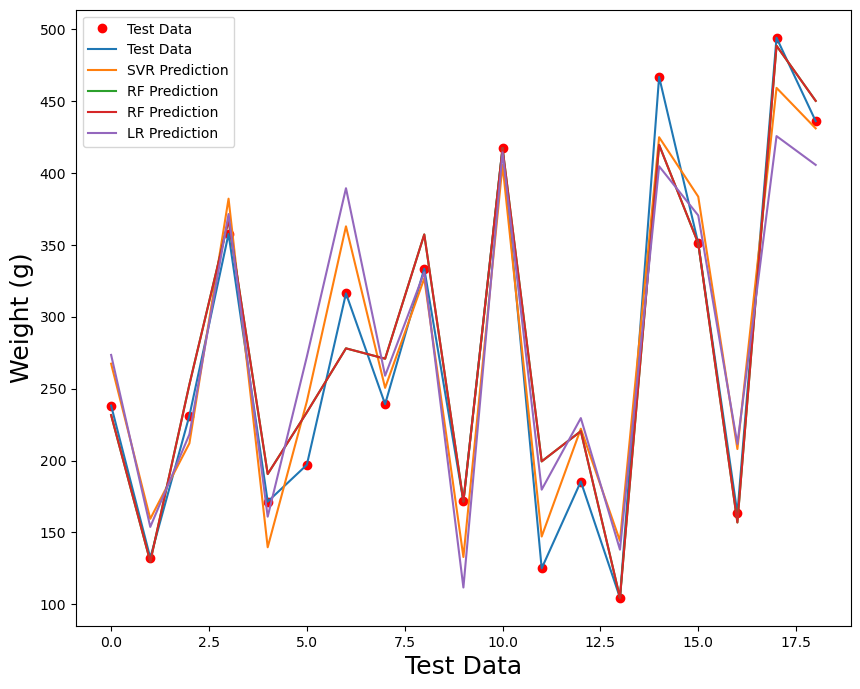

In [117]:
plt.figure(figsize=(10, 8))
plt.plot(pred_df3['y_test'], 'r.', markersize=12, label='Test Data')
plt.plot(pred_df3['y_test'], label='Test Data')
plt.plot(pred_df3['SVR_pred'], label='SVR Prediction')
plt.plot(pred_df3['RF_pred'], label='RF Prediction')
plt.plot(pred_df3['RF_pred'], label='RF Prediction')
plt.plot(pred_df3['LR_pred'], label='LR Prediction')
plt.legend()
plt.ylabel('Weight (g)', fontsize=18)
plt.xlabel('Test Data', fontsize=18)

In [118]:
mae_df3

,SVR MAE,RF MAE,MLP MAE,LR MAE
0,28.860302,19.607895,31.433065,36.232952


# #4:  SELECTING THE BEST MODEL

#### K-fold cross-validation

#### rand=20

In [112]:
pred_df_dry, mae_df_dry, residue_dry = robust_model(new_bdata, nature='dry', rand=20)
pred_df_dry

,y_test,SVR_pred,RF_pred,MLP_pred,LR_pred
0,277.8,293.456824,287.706,309.599511,360.146701
1,609.2,623.577417,605.164,661.925199,622.574227
2,104.6,147.558555,125.782,144.667417,113.109308
3,265.6,281.512808,271.670,304.299739,309.744936
4,234.2,219.767833,268.624,234.006881,248.926423
5,376.8,378.772072,381.386,378.789948,418.965824
6,171.4,156.988723,171.792,142.126456,140.066617
7,217.2,229.502645,244.226,261.350555,261.660366
8,280.2,217.166730,243.926,242.617640,245.869575
9,109.4,151.057771,138.580,138.042937,78.757681


In [113]:
mae_df_dry

,SVR MAE,RF MAE,MLP MAE,LR MAE
0,25.698461,24.623,32.921199,38.668612


In [114]:
print('The Percentage Error for the SVR is:', np.round(error_perc_pandas(pred_df_dry[['y_test', 'SVR_pred']], reg='SVR'), 2),'%')
print('The Percentage Error for the RF is:', np.round(error_perc_pandas(pred_df_dry[['y_test', 'RF_pred']], reg='RF'), 2),'%')
print('The Percentage Error for the MLP is:', np.round(error_perc_pandas(pred_df_dry[['y_test', 'MLP_pred']], reg='MLP'), 2),'%')
print('The Percentage Error for the LR is:', np.round(error_perc_pandas(pred_df_dry[['y_test', 'LR_pred']], reg='LR'), 2),'%')

The Percentage Error for the SVR is: 11.95 %
The Percentage Error for the RF is: 9.54 %
The Percentage Error for the MLP is: 14.37 %
The Percentage Error for the LR is: 15.76 %


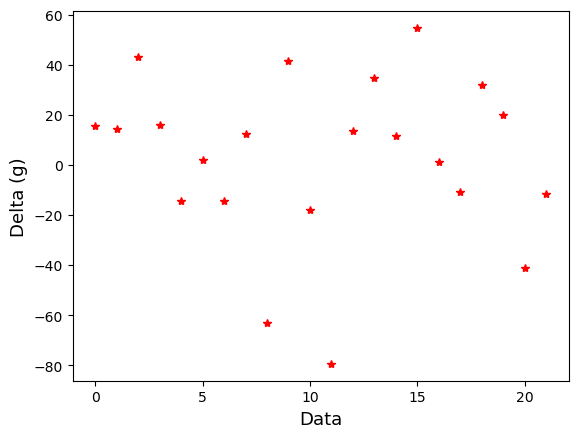

In [115]:
plot_residual(pred_df_dry['y_test'], pred_df_dry['SVR_pred'])

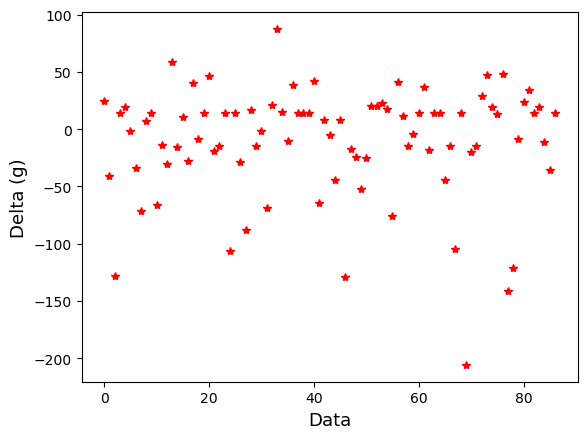

In [116]:
plot_residual(residue_dry['y_train'], residue_dry['SVR_pred'])

#### rand=30

In [117]:
pred_df_dry, mae_df_dry, residue_dry = robust_model(new_bdata, nature='dry', rand=30)
pred_df_dry

,y_test,SVR_pred,RF_pred,MLP_pred,LR_pred
0,609.2,623.577417,602.284,661.681335,622.574227
1,466.8,455.361796,390.066,452.954791,431.009784
2,492.6,493.902221,490.458,489.691804,460.919717
3,451.8,466.224071,453.630,532.460833,483.733110
4,523.0,482.451830,506.024,493.146948,464.300518
5,237.4,228.591232,230.864,240.394099,242.563728
6,137.8,160.392885,138.258,138.802256,70.051315
7,175.0,156.264047,164.910,155.698639,101.413341
8,187.4,159.659727,177.058,152.176719,83.363997
9,264.6,278.508652,276.670,275.449678,297.615810


In [118]:
print('The Percentage Error for the SVR is:', np.round(error_perc_pandas(pred_df_dry[['y_test', 'SVR_pred']], reg='SVR'), 2),'%')
print('The Percentage Error for the RF is:', np.round(error_perc_pandas(pred_df_dry[['y_test', 'RF_pred']], reg='RF'), 2),'%')
print('The Percentage Error for the MLP is:', np.round(error_perc_pandas(pred_df_dry[['y_test', 'MLP_pred']], reg='MLP'), 2),'%')
print('The Percentage Error for the LR is:', np.round(error_perc_pandas(pred_df_dry[['y_test', 'LR_pred']], reg='LR'), 2),'%')

The Percentage Error for the SVR is: 10.37 %
The Percentage Error for the RF is: 6.35 %
The Percentage Error for the MLP is: 9.98 %
The Percentage Error for the LR is: 16.76 %


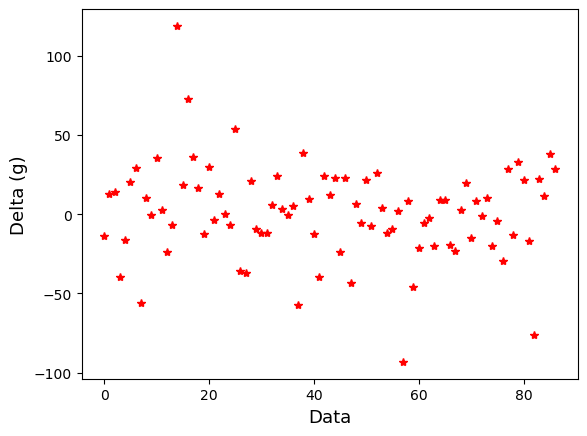

In [120]:
plot_residual(residue_dry['y_train'], residue_dry['RF_pred'])

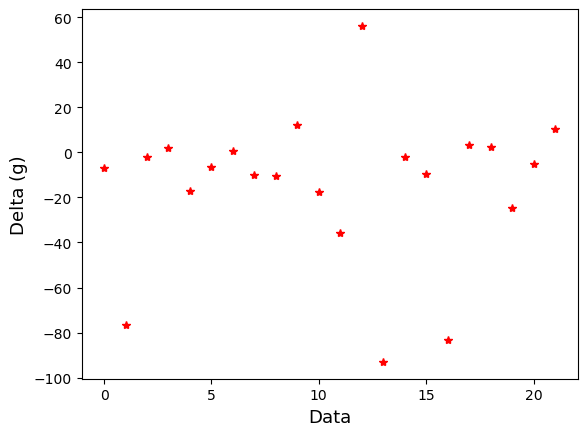

In [121]:
plot_residual(pred_df_dry['y_test'], pred_df_dry['RF_pred'])

In [84]:
mae_df_dry

,SVR MAE,RF MAE,MLP MAE,LR MAE
0,34.956797,22.727909,34.842323,47.771588


In [125]:
pred_df_dry, mae_df_dry, residue_dry = robust_model(new_bdata, nature='dry', rand=5)
pred_df_dry

,y_test,SVR_pred,RF_pred,MLP_pred,LR_pred
0,436.0,455.822493,446.290,462.106063,435.871908
1,266.0,285.847008,294.624,292.030723,300.660231
2,237.4,228.591232,228.482,242.447552,242.563728
3,544.6,533.811602,535.430,525.851444,524.150215
4,333.4,331.754750,320.880,326.872032,348.971503
5,171.4,156.988723,170.364,152.052550,140.066617
6,149.4,164.817114,165.212,179.984940,161.376068
7,280.2,217.166730,238.510,239.055950,245.869575
8,185.4,199.718590,206.428,221.571937,227.729617
9,209.8,223.316781,215.920,230.527950,246.497924


In [126]:
mae_df_dry

,SVR MAE,RF MAE,MLP MAE,LR MAE
0,19.270448,14.128727,25.026419,26.398836


In [127]:
print('The Percentage Error for the SVR is:', np.round(error_perc_pandas(pred_df_dry[['y_test', 'SVR_pred']], reg='SVR'), 2),'%')
print('The Percentage Error for the RF is:', np.round(error_perc_pandas(pred_df_dry[['y_test', 'RF_pred']], reg='RF'), 2),'%')
print('The Percentage Error for the MLP is:', np.round(error_perc_pandas(pred_df_dry[['y_test', 'MLP_pred']], reg='MLP'), 2),'%')
print('The Percentage Error for the LR is:', np.round(error_perc_pandas(pred_df_dry[['y_test', 'LR_pred']], reg='LR'), 2),'%')

The Percentage Error for the SVR is: 8.27 %
The Percentage Error for the RF is: 5.81 %
The Percentage Error for the MLP is: 10.95 %
The Percentage Error for the LR is: 10.79 %


## Using YellowBrick for the Visualization

In [131]:
X_var = new_bdata[['length(cm)', 'circumference(cm)', 'width(cm)']]

# Wet Weight
y_var_wet = new_bdata['wet_weight(g)']

# Dry Weight
y_var_dry = new_bdata['dry weight(g)']

In [132]:
def plot_residual_advance(X, y, rand_num):
    
    # Create the train and test data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=rand_num)

    # Instantiate the linear model and visualizer
    model = Ridge()
    visualizer = ResidualsPlot(model)

    visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
    visualizer.score(X_test, y_test)  # Evaluate the model on the test data
    visualizer.show()                 # Finalize and render the figure

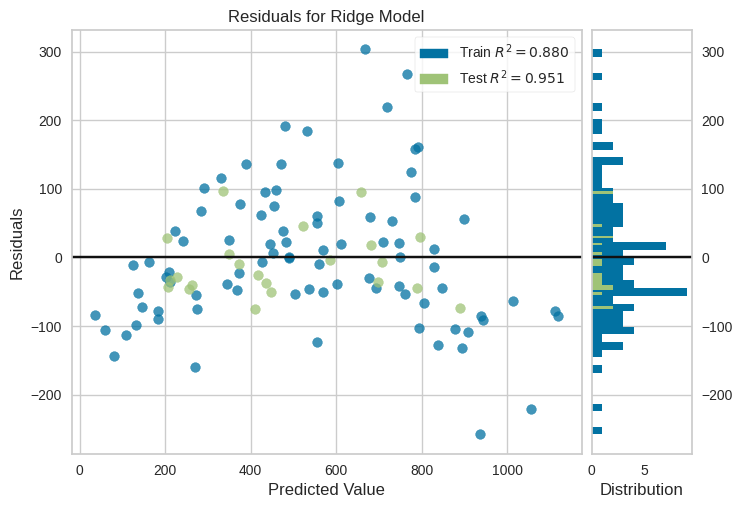

In [176]:
#  Wet Weight
plot_residual_advance(X=X_var, y=y_var_wet, rand_num=5)

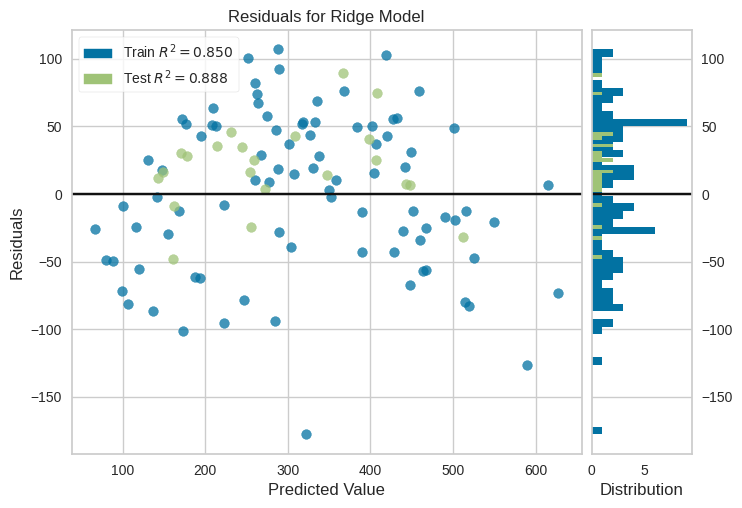

In [177]:
#  Dry Weight
plot_residual_advance(X=X_var, y=y_var_dry, rand_num=5)

In [ ]:
# Load a regression dataset
X, y = load_concrete()

# Create the train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate the linear model and visualizer
model = Ridge()
visualizer = ResidualsPlot(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()                 # Finalize and render the figure

In [88]:
pred_df_dry, mae_df_dry, residue_dry = robust_model(new_bdata, nature='dry', rand=2)
pred_df_dry

,y_test,SVR_pred,RF_pred,MLP_pred,LR_pred
0,196.0,238.432476,230.024,240.212732,261.843783
1,403.4,385.572127,395.802,380.409082,382.474354
2,309.8,320.078146,307.776,318.640740,336.174692
3,217.2,229.502645,238.024,254.916467,261.660366
4,283.6,302.823125,288.956,315.633718,315.757084
5,157.2,178.441326,208.266,186.733260,188.766232
6,325.0,197.221309,283.366,217.545198,244.334235
7,185.0,150.896889,166.544,161.186553,144.423603
8,185.4,199.718590,204.272,218.359976,227.729617
9,146.2,180.874333,180.864,194.218584,210.695120


In [89]:
print('The Percentage Error for the SVR is:', np.round(error_perc_pandas(pred_df_dry[['y_test', 'SVR_pred']], reg='SVR'), 2),'%')
print('The Percentage Error for the RF is:', np.round(error_perc_pandas(pred_df_dry[['y_test', 'RF_pred']], reg='RF'), 2),'%')
print('The Percentage Error for the MLP is:', np.round(error_perc_pandas(pred_df_dry[['y_test', 'MLP_pred']], reg='MLP'), 2),'%')
print('The Percentage Error for the LR is:', np.round(error_perc_pandas(pred_df_dry[['y_test', 'LR_pred']], reg='LR'), 2),'%')

The Percentage Error for the SVR is: 14.98 %
The Percentage Error for the RF is: 11.22 %
The Percentage Error for the MLP is: 14.23 %
The Percentage Error for the LR is: 17.24 %


In [126]:
mae_df_dry

,SVR MAE,RF MAE,MLP MAE,LR MAE
0,35.729083,23.682909,36.689318,43.961409


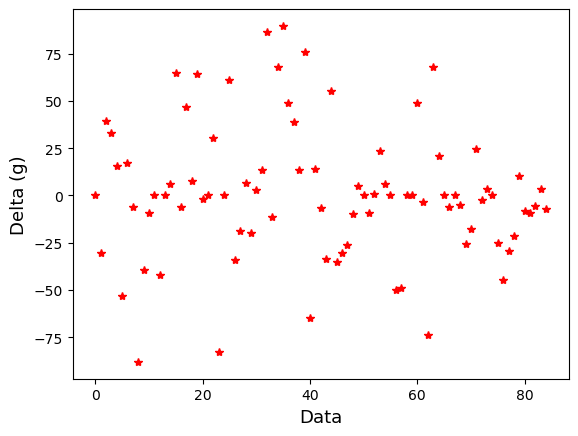

In [127]:
plot_residual(final_dry_res['y_train'], final_dry_res['RF_pred'])

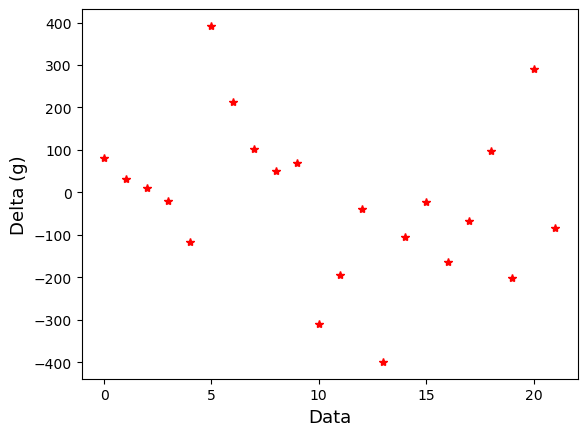

In [128]:
plot_residual(pred_df_dry['y_test'], final_dry_res['RF_pred'])

In [129]:
pred_df_dry, mae_df_dry, residue_dry = robust_model(new_bdata, nature='dry', rand=100)
pred_df_dry

,y_test,SVR_pred,RF_pred,MLP_pred,LR_pred
0,421.6,417.213050,431.870,442.055560,443.286280
1,382.0,440.456817,398.488,464.539626,468.345852
2,309.8,320.078146,314.520,318.470002,336.174692
3,354.4,334.185911,340.230,335.925663,346.152557
4,521.4,528.743623,512.430,513.228887,507.869322
5,267.8,250.577489,256.024,267.403470,266.652219
6,347.4,341.981803,341.384,335.127470,358.733113
7,130.2,147.871811,136.694,148.825020,133.354610
8,371.6,412.510058,375.368,415.321002,423.159458
9,499.8,293.986382,399.650,303.768777,313.866602


In [130]:
mae_df_dry

,SVR MAE,RF MAE,MLP MAE,LR MAE
0,36.70714,18.232182,36.381268,46.005896


### YOU have your model!!!

### HURRAY! !! !!!

---
### Predicting Untrained Data

In [131]:
def robust_model(data, nature='wet', rand=30, default=True):
    """Train and predict Weights using the Four Regressors Model.
    
    Param
    ------
    Data: DataFrame containing the independent and dependent variables.
    nature: Determines the weight to train either wet or dry
    rand: Used for cross validation to randomize the training data.
    
    returns:
    DataFrames of the model training of the test dataset and the error analysis.
    """
    independent_var = data[['length(cm)', 'circumference(cm)', 'width(cm)']]
    
    if nature.lower() == 'wet':
        response_var = data['wet_weight(g)']
    else:
        response_var = data['dry weight(g)']

    model = WeightModel(feature = independent_var, 
                            label = response_var, 
                            test_fraction = 0.2)
    
    # Splitting the dataset
    X_train_sca, X_test_scaled, y_train_sca, y_test = model.dataset_scaler(rand_num=rand)
    # Transform the y_test dataset to be used for validation
    y_actual = model.transform_label.inverse_transform(y_test.reshape(-1, 1))
    
    # Training the model using the four regressor algorithms
    svr_model = model.ml_regressors(regressor='SVR', default=default)
    rf_model = model.ml_regressors(regressor='RF', default=default)
    mlp_model = model.ml_regressors(regressor='MLP', default=default)
    lr_model = model.ml_regressors(regressor='LR', default=default)
    
    # Check RESIDUAL to see how the model behaves with the training dataset
    y_train_calc_svr = model.weight_predict(svr_model, X_train_sca)
    y_train_calc_rf = model.weight_predict(rf_model, X_train_sca)
    y_train_calc_mlp = model.weight_predict(mlp_model, X_train_sca)
    y_train_calc_lr = model.weight_predict(lr_model, X_train_sca)
    # obtaining the actual training y_val
    ytrain = model.transform_label.inverse_transform(y_train_sca.reshape(-1, 1))
    
    train_pred_stacked = np.hstack((ytrain, y_train_calc_svr, y_train_calc_rf, y_train_calc_mlp, y_train_calc_lr))
    residual_df = pd.DataFrame(train_pred_stacked, columns=['y_train', 'SVR_pred', 'RF_pred', 'MLP_pred', 'LR_pred'])
    
    # Predicting the test variables
    y_pred_svr = model.weight_predict(svr_model, X_test_scaled)
    y_pred_rf = model.weight_predict(rf_model, X_test_scaled)
    y_pred_mlp = model.weight_predict(mlp_model, X_test_scaled)
    y_pred_lr = model.weight_predict(lr_model, X_test_scaled)
    
    # Combining the prediction and creating a dataframe of all the regressor algorithms.
    err_stack = np.hstack((y_actual, y_pred_svr, y_pred_rf, y_pred_mlp, y_pred_lr))
    prediction_df = pd.DataFrame(err_stack, columns=['y_test', 'SVR_pred', 'RF_pred', 'MLP_pred', 'LR_pred'])
    
    # Combining the error and creating a dataframe
    MAE_stack = np.vstack((
        MAE(np.hstack((y_actual, y_pred_svr))),
        MAE(np.hstack((y_actual, y_pred_rf))),
        MAE(np.hstack((y_actual, y_pred_mlp))),
        MAE(np.hstack((y_actual, y_pred_lr))),
    ))
    
    MAE_df = pd.DataFrame(MAE_stack.T, columns=['SVR MAE', 'RF MAE', 'MLP MAE', 'LR MAE'])
    
    return prediction_df, MAE_df, residual_df

In [132]:
independent_var = new_bdata[['length(cm)', 'circumference(cm)', 'width(cm)']]
response_var = new_bdata['wet_weight(g)']

wet_model = WeightModel(feature = independent_var, 
                        label = response_var, 
                        test_fraction = 0.2)

In [133]:
X_train_sca, X_test_scaled, y_train_sca, y_test = wet_model.dataset_scaler(rand_num=5)

In [134]:
y_actual = wet_model.transform_label.inverse_transform(y_test.reshape(-1, 1))

In [135]:
trained_model = wet_model.ml_regressors(regressor='RF')

In [136]:
y_pred = wet_model.weight_predict(trained_model, X_test_scaled)
err_svr = np.hstack((y_pred, y_actual))
#err_svr

In [137]:
print('The Mean Absolute Error for the SVR is:', MAE(err_svr))
print(f'The Percentage Error for the SVR is: {np.round(error_perc(err_svr), 2)} %')

The Mean Absolute Error for the SVR is: 27.016363636363632
The Percentage Error for the SVR is: 6.04 %


In [138]:
x_validate =[
    [84, 16.5, 4.9], 
    [97, 14, 4.3], 
    [104, 15.5, 4.55], 
    [51, 15, 4.3],
    [56, 16.5, 4.86],
    [64, 14, 4.33],
    [68, 16, 4.8]
]

x_val_scale = wet_model.transform_scaler.transform(x_validate)
x_val_scale

array([[ 0.70006246,  2.10921835,  2.06951549],
       [ 1.32766496,  1.07770004,  1.24687657],
       [ 1.66560477,  1.69661103,  1.58964279],
       [-0.89308234,  1.49030736,  1.24687657],
       [-0.65169676,  2.10921835,  2.01467289],
       [-0.26547984,  1.07770004,  1.28800852],
       [-0.07237138,  1.90291469,  1.932409  ]])

In [139]:
y_val = np.array([[544, 786, 1206.2, 406, 478.6, 523, 610.8]]).T

In [141]:
y_val_pred = wet_model.weight_predict(trained_model, x_val_scale)
err_svr = np.hstack((y_val_pred, y_val))
err_svr

array([[1113.16,  544.  ],
       [ 938.58,  786.  ],
       [ 985.9 , 1206.2 ],
       [ 680.24,  406.  ],
       [ 934.6 ,  478.6 ],
       [ 643.36,  523.  ],
       [ 879.78,  610.8 ]])

In [142]:
print('The Mean Absolute Error for the SVR is:', MAE(err_svr))
print(f'The Percentage Error for the SVR is: {np.round(error_perc(err_svr), 2)} %')

The Mean Absolute Error for the SVR is: 294.51714285714286
The Percentage Error for the SVR is: 53.17 %


In [143]:
def validate_model(data, X_val, y_val, nature='wet', rand=30, default=True):
    """Train and predict Weights using the Four Regressors Model.
    
    Param
    ------
    Data: DataFrame containing the independent and dependent variables.
    nature: Determines the weight to train either wet or dry
    rand: Used for cross validation to randomize the training data.
    X_val: The independent untrained buried root proxies data
    y_val: The real weight of the buried root proxies.
    
    returns:
    DataFrames of the model training of the test dataset and the error analysis.
    """
    independent_var = data[['length(cm)', 'circumference(cm)', 'width(cm)']]
    
    if nature.lower() == 'wet':
        response_var = data['wet_weight(g)']
    else:
        response_var = data['dry weight(g)']

    model = WeightModel(feature = independent_var, 
                            label = response_var, 
                            test_fraction = 0.2)
    # Splitting the dataset
    X_train_sca, X_test_scaled, y_train_sca, y_test = model.dataset_scaler(rand_num=rand)
    # Transform the y_test dataset to be used for validation
    y_actual = model.transform_label.inverse_transform(y_test.reshape(-1, 1))
    
    # Training the model using the four regressor algorithms
    svr_model = model.ml_regressors(regressor='SVR', default=default)
    rf_model = model.ml_regressors(regressor='RF', default=default)
    mlp_model = model.ml_regressors(regressor='MLP', default=default)
    lr_model = model.ml_regressors(regressor='LR', default=default)
    
    X_val_scale = model.transform_scaler.transform(X_val)
    
    # Predicting the test variables
    y_pred_svr = model.weight_predict(svr_model, X_val_scale)
    y_pred_rf = model.weight_predict(rf_model, X_val_scale)
    y_pred_mlp = model.weight_predict(mlp_model, X_val_scale)
    y_pred_lr = model.weight_predict(lr_model, X_val_scale)
    
    # Combining the prediction and creating a dataframe of all the regressor algorithms.
    err_stack = np.hstack((y_val, y_pred_svr, y_pred_rf, y_pred_mlp, y_pred_lr))
    prediction_df = pd.DataFrame(err_stack, columns=['y_val', 'SVR_pred', 'RF_pred', 'MLP_pred', 'LR_pred'])
    
    # Combining the error and creating a dataframe
    MAE_stack = np.vstack((
        MAE(np.hstack((y_val, y_pred_svr))),
        MAE(np.hstack((y_val, y_pred_rf))),
        MAE(np.hstack((y_val, y_pred_mlp))),
        MAE(np.hstack((y_val, y_pred_lr))),
    ))
    
    MAE_df = pd.DataFrame(MAE_stack.T, columns=['SVR MAE', 'RF MAE', 'MLP MAE', 'LR MAE'])
    
    return prediction_df, MAE_df

### WET WEIGHT VALIDATION

In [144]:
def error_perc_all(actual_arr, pred_arr):
    return np.abs((actual_arr - pred_arr) / actual_arr) *100

def weight_perc_change_df(data, label='y_val'):
    svr = np.array(error_perc_all(data[label], data['SVR_pred'])).reshape(-1, 1)
    rf = np.array(error_perc_all(data[label], data['RF_pred'])).reshape(-1, 1)
    mlp = np.array(error_perc_all(data[label], data['MLP_pred'])).reshape(-1, 1)
    lr = np.array(error_perc_all(data[label], data['LR_pred'])).reshape(-1, 1)
        
    stack = np.hstack((svr, rf, mlp, lr))
    prediction_df = pd.DataFrame(stack, columns=['SVR (%)', 'RF (%)', 'MLP (%)', 'LR (%)'])
    
    return prediction_df
    

In [145]:
# Using the optimized parameters
# SVR
kern ='rbf'
c_val = 5000
gam_val = 0.001
eps_val = 0.0001

# RF 
n_est = 5
max_featR = 3

# MLP
hid_lay = 5
tol = 0.1
max_i = 100

In [146]:
pred_wet_r5, mae_wet_r5 = validate_model(data=new_bdata, X_val=x_validate,
                                         y_val=y_val, nature='wet', rand=5, default=True)
pred_wet_r5

,y_val,SVR_pred,RF_pred,MLP_pred,LR_pred
0,544.0,1153.181356,1082.76,1178.311949,1073.735063
1,786.0,1050.592027,942.96,1034.007474,998.955950
2,1206.2,1062.160126,995.08,1220.220738,1138.885419
3,406.0,568.564541,669.70,600.647970,639.664295
4,478.6,913.520047,902.36,846.862565,835.820886
5,523.0,698.965842,641.50,709.739145,736.611591
6,610.8,1009.870829,932.04,955.893481,911.635815


In [147]:
mae_wet_r5

,SVR MAE,RF MAE,MLP MAE,LR MAE
0,312.904931,290.577143,284.440475,273.61974


In [148]:
weight_perc_change_df(pred_wet_r5)

,SVR (%),RF (%),MLP (%),LR (%)
0,111.981867,99.036765,116.601461,97.377769
1,33.663108,19.969466,31.553114,27.093632
2,11.941624,17.502902,1.162389,5.580715
3,40.040527,64.950739,47.942850,57.552782
4,90.873390,88.541580,76.945793,74.638714
5,33.645476,22.657744,35.705382,40.843516
6,65.335761,52.593320,56.498605,49.252753


rand =300

In [149]:
pred_wet_r300, mae_wet_r300 = validate_model(data=new_bdata, X_val=x_validate,
                                         y_val=y_val, nature='wet', rand=300, default=True)
pred_wet_r300

,y_val,SVR_pred,RF_pred,MLP_pred,LR_pred
0,544.0,1153.181356,1108.90,1132.613013,1073.735063
1,786.0,1050.592027,930.44,1042.054192,998.955950
2,1206.2,1062.160126,955.52,1192.167533,1138.885419
3,406.0,568.564541,705.10,616.924416,639.664295
4,478.6,913.520047,907.52,860.602501,835.820886
5,523.0,698.965842,656.30,733.318890,736.611591
6,610.8,1009.870829,912.30,949.142833,911.635815


In [150]:
mae_wet_r300

,SVR MAE,RF MAE,MLP MAE,LR MAE
0,312.904931,303.262857,285.755473,273.61974


In [151]:
weight_perc_change_df(pred_wet_r300)

,SVR (%),RF (%),MLP (%),LR (%)
0,111.981867,103.841912,108.200922,97.377769
1,33.663108,18.376590,32.576869,27.093632
2,11.941624,20.782623,1.163362,5.580715
3,40.040527,73.669951,51.951827,57.552782
4,90.873390,89.619724,79.816653,74.638714
5,33.645476,25.487572,40.213937,40.843516
6,65.335761,49.361493,55.393391,49.252753


### DRY WEIGHT VALIDATION

In [152]:
# Using the optimized parameters
# SVR
kern ='rbf'
c_val = 5000
gam_val = 0.001
eps_val = 0.3

# RF 
n_est = 4
max_featR = 6

# MLP
hid_lay = 1000
tol = 0.001
max_i = 1000

rand = 2

In [153]:
pred_dry_r2, mae_dry_r2 = validate_model(data=new_bdata, X_val=x_validate,
                                         y_val=y_val, nature='dry', rand=2, default=True)
pred_dry_r2,mae_dry_r2

(    y_val    SVR_pred  RF_pred    MLP_pred     LR_pred
 0   544.0  622.901285  573.786  658.297675  600.852595
 1   786.0  560.304086  531.246  605.858242  556.120365
 2  1206.2  543.802835  551.386  701.579727  625.991499
 3   406.0  310.917998  377.368  343.207189  378.139075
 4   478.6  496.582904  455.630  474.185937  484.161578
 5   523.0  397.624758  393.612  415.441528  429.560927
 6   610.8  562.915687  524.146  540.018133  521.012156,
       SVR MAE      RF MAE    MLP MAE      LR MAE
 0  179.045547  172.428286  149.22956  154.798593)

In [154]:
weight_perc_change_df(pred_dry_r2)

,SVR (%),RF (%),MLP (%),LR (%)
0,14.503913,5.475368,21.010602,10.450845
1,28.714493,32.411450,22.918799,29.246773
2,54.916031,54.287349,41.835539,48.102181
3,23.419212,7.052217,15.466209,6.862297
4,3.757398,4.799415,0.922286,1.162051
5,23.972322,24.739579,20.565673,17.865980
6,7.839606,14.186968,11.588387,14.700040


rand = 5

In [155]:
pred_dry_r5, mae_dry_r5 = validate_model(data=new_bdata, X_val=x_validate,
                                         y_val=y_val, nature='dry', rand=5, default=True)
pred_dry_r5,mae_dry_r5

(    y_val    SVR_pred  RF_pred    MLP_pred     LR_pred
 0   544.0  622.901285  586.620  646.022148  600.852595
 1   786.0  560.304086  531.432  584.394155  556.120365
 2  1206.2  543.802835  557.772  676.988582  625.991499
 3   406.0  310.917998  377.532  355.284651  378.139075
 4   478.6  496.582904  462.872  477.303890  484.161578
 5   523.0  397.624758  408.966  421.166277  429.560927
 6   610.8  562.915687  532.340  542.762863  521.012156,
       SVR MAE      RF MAE     MLP MAE      LR MAE
 0  179.045547  168.900857  150.674533  154.798593)

In [156]:
weight_perc_change_df(pred_dry_r5)

,SVR (%),RF (%),MLP (%),LR (%)
0,14.503913,7.834559,18.754071,10.450845
1,28.714493,32.387786,25.649599,29.246773
2,54.916031,53.757917,43.874268,48.102181
3,23.419212,7.011823,12.491465,6.862297
4,3.757398,3.286252,0.270813,1.162051
5,23.972322,21.803824,19.471075,17.865980
6,7.839606,12.845449,11.139020,14.700040


rand = 20

In [157]:
pred_dry_r20, mae_dry_r20 = validate_model(data=new_bdata, X_val=x_validate,
                                         y_val=y_val, nature='dry', rand=20, default=True)
pred_dry_r20,mae_dry_r20

(    y_val    SVR_pred  RF_pred    MLP_pred     LR_pred
 0   544.0  622.901285  571.920  642.642201  600.852595
 1   786.0  560.304086  528.986  584.961180  556.120365
 2  1206.2  543.802835  558.378  668.941311  625.991499
 3   406.0  310.917998  385.144  355.068234  378.139075
 4   478.6  496.582904  467.186  481.504976  484.161578
 5   523.0  397.624758  400.192  434.420985  429.560927
 6   610.8  562.915687  536.304  543.816165  521.012156,
       SVR MAE      RF MAE     MLP MAE      LR MAE
 0  179.045547  166.047143  149.477043  154.798593)

In [158]:
weight_perc_change_df(pred_dry_r20)

,SVR (%),RF (%),MLP (%),LR (%)
0,14.503913,5.132353,18.132758,10.450845
1,28.714493,32.698982,25.577458,29.246773
2,54.916031,53.707677,44.541427,48.102181
3,23.419212,5.136946,12.544770,6.862297
4,3.757398,2.384873,0.606974,1.162051
5,23.972322,23.481453,16.936714,17.865980
6,7.839606,12.196464,10.966574,14.700040


rand = 30

In [159]:
pred_dry_r30, mae_dry_r30 = validate_model(data=new_bdata, X_val=x_validate,
                                         y_val=y_val, nature='dry', rand=30, default=True)
pred_dry_r30,mae_dry_r30

(    y_val    SVR_pred  RF_pred    MLP_pred     LR_pred
 0   544.0  622.901285  593.098  654.499788  600.852595
 1   786.0  560.304086  531.074  592.735109  556.120365
 2  1206.2  543.802835  564.700  682.012487  625.991499
 3   406.0  310.917998  379.124  354.640548  378.139075
 4   478.6  496.582904  463.468  473.971063  484.161578
 5   523.0  397.624758  398.994  421.461146  429.560927
 6   610.8  562.915687  546.112  537.988936  521.012156,
       SVR MAE      RF MAE     MLP MAE      LR MAE
 0  179.045547  168.032286  151.184357  154.798593)

In [160]:
weight_perc_change_df(pred_dry_r30)

,SVR (%),RF (%),MLP (%),LR (%)
0,14.503913,9.025368,20.312461,10.450845
1,28.714493,32.433333,24.588409,29.246773
2,54.916031,53.183552,43.457761,48.102181
3,23.419212,6.619704,12.650111,6.862297
4,3.757398,3.161722,0.967183,1.162051
5,23.972322,23.710516,19.414695,17.865980
6,7.839606,10.590701,11.920606,14.700040


rand = 50

In [161]:
pred_dry_r50, mae_dry_r50 = validate_model(data=new_bdata, X_val=x_validate,
                                         y_val=y_val, nature='dry', rand=50, default=True)
pred_dry_r50,mae_dry_r50

(    y_val    SVR_pred  RF_pred    MLP_pred     LR_pred
 0   544.0  622.901285  586.832  629.752777  600.852595
 1   786.0  560.304086  529.430  575.663189  556.120365
 2  1206.2  543.802835  564.040  650.442677  625.991499
 3   406.0  310.917998  379.772  362.692996  378.139075
 4   478.6  496.582904  463.140  472.884858  484.161578
 5   523.0  397.624758  395.850  431.251207  429.560927
 6   610.8  562.915687  544.646  535.161666  521.012156,
       SVR MAE      RF MAE     MLP MAE      LR MAE
 0  179.045547  168.079143  152.608026  154.798593)

In [162]:
weight_perc_change_df(pred_dry_r50)

,SVR (%),RF (%),MLP (%),LR (%)
0,14.503913,7.873529,15.763378,10.450845
1,28.714493,32.642494,26.760408,29.246773
2,54.916031,53.238269,46.075056,48.102181
3,23.419212,6.460099,10.666750,6.862297
4,3.757398,3.230255,1.194138,1.162051
5,23.972322,24.311663,17.542790,17.865980
6,7.839606,10.830714,12.383486,14.700040


rand = 100

In [163]:
pred_dry_r100, mae_dry_r100 = validate_model(data=new_bdata, X_val=x_validate,
                                         y_val=y_val, nature='dry', rand=100, default=True)
pred_dry_r100,mae_dry_r100

(    y_val    SVR_pred  RF_pred    MLP_pred     LR_pred
 0   544.0  622.901285  596.486  636.929525  600.852595
 1   786.0  560.304086  531.532  581.588130  556.120365
 2  1206.2  543.802835  568.916  667.316686  625.991499
 3   406.0  310.917998  375.332  348.076365  378.139075
 4   478.6  496.582904  459.104  477.501657  484.161578
 5   523.0  397.624758  405.056  421.270245  429.560927
 6   610.8  562.915687  553.244  541.597901  521.012156,
       SVR MAE      RF MAE    MLP MAE      LR MAE
 0  179.045547  167.128857  152.31122  154.798593)

In [164]:
weight_perc_change_df(pred_dry_r100)

,SVR (%),RF (%),MLP (%),LR (%)
0,14.503913,9.648162,17.082633,10.450845
1,28.714493,32.375064,26.006599,29.246773
2,54.916031,52.834024,44.676116,48.102181
3,23.419212,7.553695,14.266905,6.862297
4,3.757398,4.073548,0.229491,1.162051
5,23.972322,22.551434,19.451196,17.865980
6,7.839606,9.423052,11.329748,14.700040


## Validation with Estimated Values

In [166]:
xx_validate =[
    [73.1, 39.73, 11.8], 
    [79.9, 18.18, 5.4], 
    [113.9, 26.26, 7.8], 
    [54.5, 33.34, 9.9],
    [52.4, 20.88, 6.2],
    [62, 18.18, 5.4],
    [55, 29.97, 8.9]
]

xx_val_scale = wet_model.transform_scaler.transform(x_validate)
xx_val_scale

array([[ 0.70006246,  2.10921835,  2.06951549],
       [ 1.32766496,  1.07770004,  1.24687657],
       [ 1.66560477,  1.69661103,  1.58964279],
       [-0.89308234,  1.49030736,  1.24687657],
       [-0.65169676,  2.10921835,  2.01467289],
       [-0.26547984,  1.07770004,  1.28800852],
       [-0.07237138,  1.90291469,  1.932409  ]])

In [168]:
val_pw_r5, val_mae_w_r5 = validate_model(data=new_bdata, X_val=xx_validate,
                                         y_val=y_val, nature='wet', rand=20)
val_pw_r5

,y_val,SVR_pred,RF_pred,MLP_pred,LR_pred
0,544.0,617.287963,1188.34,3058.185985,2975.674630
1,786.0,1182.659863,1206.08,1276.033488,1184.483448
2,1206.2,617.361024,1203.02,2323.341014,2154.502660
3,406.0,617.287963,1008.96,2301.567582,2275.736231
4,478.6,768.299721,1003.38,1199.472076,1190.950430
5,523.0,1117.742367,1060.34,1076.252488,1038.373043
6,610.8,617.288045,1015.92,2018.186058,1991.225623


In [169]:
val_mae_w_r5

,SVR MAE,RF MAE,MLP MAE,LR MAE
0,308.714985,448.257143,1242.634099,1179.478009


In [170]:
val_pd_r5, val_mae_d_r5 = validate_model(data=new_bdata, X_val=xx_validate,
                                         y_val=y_val, nature='dry', rand=20)
val_pd_r5

,y_val,SVR_pred,RF_pred,MLP_pred,LR_pred
0,544.0,335.975926,681.596,1660.221462,1640.555139
1,786.0,631.748729,687.458,717.437199,663.056010
2,1206.2,336.012517,688.778,1254.028537,1174.511595
3,406.0,335.975926,549.060,1273.143678,1268.652618
4,478.6,417.275695,549.060,680.881173,679.619474
5,523.0,607.583487,618.376,612.194414,592.093217
6,610.8,335.975968,553.966,1122.826676,1113.676081


In [171]:
val_mae_d_r5

,SVR MAE,RF MAE,MLP MAE,LR MAE
0,246.174104,159.898571,414.751249,412.404132
